# Mello ML - Dual Vector System Demonstration

This notebook demonstrates the complete dual-vector pipeline:
1. Create a population with synthetic users
2. Load and process a real user from frontend JSON
3. Visualize embeddings using UMAP and PCA

## Architecture Overview
- **Interests Vector**: 3072 dimensions
- **Personality Vector**: 3840 dimensions (5 traits × 768 each)
- **Combined Vector**: 6912 dimensions total

In [1]:
# Import required libraries
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import umap
import logging
import warnings
from pathlib import Path

# Import our custom classes
from user import User
from population import Population
from profile_generator import ProfileGenerator
from embedding_generator import EmbeddingGenerator
from dual_vector_utils import process_frontend_json_to_user

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

print("✅ Imports successful! Ready to start the dual-vector pipeline.")

/Users/yahyarahhawi/miniforge3/envs/ml/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Imports successful! Ready to start the dual-vector pipeline.


## Step 1: Create Population with Synthetic Users

Generate a diverse population of synthetic users with different personality types and interests.

In [ ]:
# Initialize generators
print("Initializing AI generators...")
profile_generator = ProfileGenerator()
embedding_generator = EmbeddingGenerator()

print(f"📝 Profile Generator: {profile_generator.taste_profile_model}")
print(f"🔢 Embedding Generator: {embedding_generator.model_name} ({embedding_generator.embedding_dimensions}D)")

# Create population
population = Population("Mello Campus Community")

# Generate synthetic users with dual-vector profiles (NO LEGACY PROCESSING)
print("\n🤖 Generating synthetic users with DUAL-VECTOR ONLY...")
print("This may take a few minutes due to API calls...")

# Generate synthetic users using ONLY the dual-vector approach
num_synthetic_users = 100  # Reduced for testing
successful_users = 0

def progress_callback(current, total):
    percent = (current / total) * 100
    print(f"Progress: {current}/{total} ({percent:.1f}%)")

print(f"\n🎭 Generating {num_synthetic_users} synthetic users with dual-vector profiles...")
for i in range(num_synthetic_users):
    try:
        # Generate a synthetic user with realistic JSON structure
        print(f"   Generating user {i+1}/{num_synthetic_users}...")
        synthetic_user = profile_generator.generate_synthetic_user()
        
        if synthetic_user:
            print(f"   Processing {synthetic_user.name} through dual-vector pipeline...")
            
            # Generate ONLY dual profiles (interests + personality)
            profile_success = profile_generator.generate_dual_profiles(synthetic_user)
            
            if profile_success:
                # Generate ONLY dual embeddings (3072 + 3840 dims)
                embedding_success = embedding_generator.embed_user_dual(synthetic_user)
                
                if embedding_success:
                    # Remove any legacy embedding if it exists
                    if hasattr(synthetic_user, 'embedding'):
                        delattr(synthetic_user, 'embedding')
                    if hasattr(synthetic_user, 'taste_profile'):
                        delattr(synthetic_user, 'taste_profile')
                    
                    population.add_user(synthetic_user)
                    successful_users += 1
                    print(f"   ✅ Successfully processed {synthetic_user.name} with dual vectors only")
                else:
                    print(f"   ❌ Failed to generate dual embeddings for {synthetic_user.name}")
            else:
                print(f"   ❌ Failed to generate dual profiles for {synthetic_user.name}")
        else:
            print(f"   ❌ Failed to generate synthetic user {i+1}")
            
    except Exception as e:
        print(f"   ❌ Error generating user {i+1}: {e}")

print(f"\n🎯 Generated {successful_users}/{num_synthetic_users} synthetic users with DUAL VECTORS ONLY")
print(f"📊 Population stats: {population.get_statistics()}")

# Verify no legacy data exists
print(f"\n🔍 Verification - checking for legacy data...")
legacy_count = 0
for user in population.users:
    if hasattr(user, 'embedding') or hasattr(user, 'taste_profile'):
        legacy_count += 1

print(f"   Users with legacy data: {legacy_count} (should be 0)")
print(f"   Users with dual embeddings: {len(population.get_users_with_embeddings('dual'))}")
print("✅ Dual-vector only generation complete!")

INFO:profile_generator:Building JSON manually for Richard Stewart (Low Neuroticism, High Openness...)


Initializing AI generators...
📝 Profile Generator: google/gemini-2.0-flash-001
🔢 Embedding Generator: gemini-embedding-001 (3072D)

🤖 Generating synthetic users with DUAL-VECTOR ONLY...
This may take a few minutes due to API calls...

🎭 Generating 100 synthetic users with dual-vector profiles...
   Generating user 1/100...


INFO:profile_generator:Successfully built complete JSON for Richard Stewart
INFO:profile_generator:Created synthetic user from JSON: Richard Stewart


   Processing Richard Stewart through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Richard Stewart
INFO:profile_generator:Generated Openness profile for Richard Stewart
INFO:profile_generator:Generated Conscientiousness profile for Richard Stewart
INFO:profile_generator:Generated Extraversion profile for Richard Stewart
INFO:profile_generator:Generated Agreeableness profile for Richard Stewart
INFO:profile_generator:Generated Neuroticism profile for Richard Stewart
INFO:profile_generator:Generated all personality profiles for Richard Stewart
INFO:embedding_generator:Generated interests embedding for Richard Stewart (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Richard Stewart (shape: (3840,))
INFO:profile_generator:Building JSON manually for James Rodriguez (Low Openness, Low Neuroticism ...)


   ✅ Successfully processed Richard Stewart with dual vectors only
   Generating user 2/100...


INFO:profile_generator:Successfully built complete JSON for James Rodriguez
INFO:profile_generator:Created synthetic user from JSON: James Rodriguez


   Processing James Rodriguez through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for James Rodriguez
INFO:profile_generator:Generated Openness profile for James Rodriguez
INFO:profile_generator:Generated Conscientiousness profile for James Rodriguez
INFO:profile_generator:Generated Extraversion profile for James Rodriguez
INFO:profile_generator:Generated Agreeableness profile for James Rodriguez
INFO:profile_generator:Generated Neuroticism profile for James Rodriguez
INFO:profile_generator:Generated all personality profiles for James Rodriguez
INFO:embedding_generator:Generated interests embedding for James Rodriguez (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for James Rodriguez (shape: (3840,))
INFO:profile_generator:Building JSON manually for Christian Powell (Low Neuroticism, High Extraver...)


   ✅ Successfully processed James Rodriguez with dual vectors only
   Generating user 3/100...


INFO:profile_generator:Successfully built complete JSON for Christian Powell
INFO:profile_generator:Created synthetic user from JSON: Christian Powell


   Processing Christian Powell through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Christian Powell
INFO:profile_generator:Generated Openness profile for Christian Powell
INFO:profile_generator:Generated Conscientiousness profile for Christian Powell
INFO:profile_generator:Generated Extraversion profile for Christian Powell
INFO:profile_generator:Generated Agreeableness profile for Christian Powell
INFO:profile_generator:Generated Neuroticism profile for Christian Powell
INFO:profile_generator:Generated all personality profiles for Christian Powell
INFO:embedding_generator:Generated interests embedding for Christian Powell (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Christian Powell (shape: (3840,))
INFO:profile_generator:Building JSON manually for Lindsay Davis (High Extraversion, High Consci...)


   ✅ Successfully processed Christian Powell with dual vectors only
   Generating user 4/100...


INFO:profile_generator:Successfully built complete JSON for Lindsay Davis
INFO:profile_generator:Created synthetic user from JSON: Lindsay Davis


   Processing Lindsay Davis through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Lindsay Davis
INFO:profile_generator:Generated Openness profile for Lindsay Davis
INFO:profile_generator:Generated Conscientiousness profile for Lindsay Davis
INFO:profile_generator:Generated Extraversion profile for Lindsay Davis
INFO:profile_generator:Generated Agreeableness profile for Lindsay Davis
INFO:profile_generator:Generated Neuroticism profile for Lindsay Davis
INFO:profile_generator:Generated all personality profiles for Lindsay Davis
INFO:embedding_generator:Generated interests embedding for Lindsay Davis (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Lindsay Davis (shape: (3840,))
INFO:profile_generator:Building JSON manually for Kelsey Smith (High Neuroticism, High Conscie...)


   ✅ Successfully processed Lindsay Davis with dual vectors only
   Generating user 5/100...


INFO:profile_generator:Successfully built complete JSON for Kelsey Smith
INFO:profile_generator:Created synthetic user from JSON: Kelsey Smith


   Processing Kelsey Smith through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Kelsey Smith
INFO:profile_generator:Generated Openness profile for Kelsey Smith
INFO:profile_generator:Generated Conscientiousness profile for Kelsey Smith
INFO:profile_generator:Generated Extraversion profile for Kelsey Smith
INFO:profile_generator:Generated Agreeableness profile for Kelsey Smith
INFO:profile_generator:Generated Neuroticism profile for Kelsey Smith
INFO:profile_generator:Generated all personality profiles for Kelsey Smith
INFO:embedding_generator:Generated interests embedding for Kelsey Smith (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Kelsey Smith (shape: (3840,))
INFO:profile_generator:Building JSON manually for Bradley Sanchez (Low Openness, Low Agreeablenes...)


   ✅ Successfully processed Kelsey Smith with dual vectors only
   Generating user 6/100...


INFO:profile_generator:Successfully built complete JSON for Bradley Sanchez
INFO:profile_generator:Created synthetic user from JSON: Bradley Sanchez


   Processing Bradley Sanchez through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Bradley Sanchez
INFO:profile_generator:Generated Openness profile for Bradley Sanchez
INFO:profile_generator:Generated Conscientiousness profile for Bradley Sanchez
INFO:profile_generator:Generated Extraversion profile for Bradley Sanchez
INFO:profile_generator:Generated Agreeableness profile for Bradley Sanchez
INFO:profile_generator:Generated Neuroticism profile for Bradley Sanchez
INFO:profile_generator:Generated all personality profiles for Bradley Sanchez
INFO:embedding_generator:Generated interests embedding for Bradley Sanchez (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Bradley Sanchez (shape: (3840,))
INFO:profile_generator:Building JSON manually for Christopher Beard (Low Agreeableness, High Consci...)


   ✅ Successfully processed Bradley Sanchez with dual vectors only
   Generating user 7/100...


INFO:profile_generator:Successfully built complete JSON for Christopher Beard
INFO:profile_generator:Created synthetic user from JSON: Christopher Beard


   Processing Christopher Beard through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Christopher Beard
INFO:profile_generator:Generated Openness profile for Christopher Beard
INFO:profile_generator:Generated Conscientiousness profile for Christopher Beard
INFO:profile_generator:Generated Extraversion profile for Christopher Beard
INFO:profile_generator:Generated Agreeableness profile for Christopher Beard
INFO:profile_generator:Generated Neuroticism profile for Christopher Beard
INFO:profile_generator:Generated all personality profiles for Christopher Beard
INFO:embedding_generator:Generated interests embedding for Christopher Beard (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Christopher Beard (shape: (3840,))
INFO:profile_generator:Building JSON manually for Caitlyn Williams (High Openness, Low Agreeablene...)


   ✅ Successfully processed Christopher Beard with dual vectors only
   Generating user 8/100...


INFO:profile_generator:Successfully built complete JSON for Caitlyn Williams
INFO:profile_generator:Created synthetic user from JSON: Caitlyn Williams


   Processing Caitlyn Williams through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Caitlyn Williams
INFO:profile_generator:Generated Openness profile for Caitlyn Williams
INFO:profile_generator:Generated Conscientiousness profile for Caitlyn Williams
INFO:profile_generator:Generated Extraversion profile for Caitlyn Williams
INFO:profile_generator:Generated Agreeableness profile for Caitlyn Williams
INFO:profile_generator:Generated Neuroticism profile for Caitlyn Williams
INFO:profile_generator:Generated all personality profiles for Caitlyn Williams
INFO:embedding_generator:Generated interests embedding for Caitlyn Williams (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Caitlyn Williams (shape: (3840,))
INFO:profile_generator:Building JSON manually for Robert Lewis (High Conscientiousness, High A...)


   ✅ Successfully processed Caitlyn Williams with dual vectors only
   Generating user 9/100...


INFO:profile_generator:Successfully built complete JSON for Robert Lewis
INFO:profile_generator:Created synthetic user from JSON: Robert Lewis


   Processing Robert Lewis through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Robert Lewis
INFO:profile_generator:Generated Openness profile for Robert Lewis
INFO:profile_generator:Generated Conscientiousness profile for Robert Lewis
INFO:profile_generator:Generated Extraversion profile for Robert Lewis
INFO:profile_generator:Generated Agreeableness profile for Robert Lewis
INFO:profile_generator:Generated Neuroticism profile for Robert Lewis
INFO:profile_generator:Generated all personality profiles for Robert Lewis
INFO:embedding_generator:Generated interests embedding for Robert Lewis (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Robert Lewis (shape: (3840,))
INFO:profile_generator:Building JSON manually for Shawn Reed (Low Openness, High Agreeablene...)


   ✅ Successfully processed Robert Lewis with dual vectors only
   Generating user 10/100...


INFO:profile_generator:Successfully built complete JSON for Shawn Reed
INFO:profile_generator:Created synthetic user from JSON: Shawn Reed


   Processing Shawn Reed through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Shawn Reed
INFO:profile_generator:Generated Openness profile for Shawn Reed
INFO:profile_generator:Generated Conscientiousness profile for Shawn Reed
INFO:profile_generator:Generated Extraversion profile for Shawn Reed
INFO:profile_generator:Generated Agreeableness profile for Shawn Reed
INFO:profile_generator:Generated Neuroticism profile for Shawn Reed
INFO:profile_generator:Generated all personality profiles for Shawn Reed
INFO:embedding_generator:Generated interests embedding for Shawn Reed (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Shawn Reed (shape: (3840,))
INFO:profile_generator:Building JSON manually for Adam Walker (Low Extraversion, Low Conscien...)


   ✅ Successfully processed Shawn Reed with dual vectors only
   Generating user 11/100...


INFO:profile_generator:Successfully built complete JSON for Adam Walker
INFO:profile_generator:Created synthetic user from JSON: Adam Walker


   Processing Adam Walker through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Adam Walker
INFO:profile_generator:Generated Openness profile for Adam Walker
INFO:profile_generator:Generated Conscientiousness profile for Adam Walker
INFO:profile_generator:Generated Extraversion profile for Adam Walker
INFO:profile_generator:Generated Agreeableness profile for Adam Walker
INFO:profile_generator:Generated Neuroticism profile for Adam Walker
INFO:profile_generator:Generated all personality profiles for Adam Walker
INFO:embedding_generator:Generated interests embedding for Adam Walker (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Adam Walker (shape: (3840,))
INFO:profile_generator:Building JSON manually for Lauren Jacobs (Low Extraversion, Low Conscien...)


   ✅ Successfully processed Adam Walker with dual vectors only
   Generating user 12/100...


INFO:profile_generator:Successfully built complete JSON for Lauren Jacobs
INFO:profile_generator:Created synthetic user from JSON: Lauren Jacobs


   Processing Lauren Jacobs through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Lauren Jacobs
INFO:profile_generator:Generated Openness profile for Lauren Jacobs
INFO:profile_generator:Generated Conscientiousness profile for Lauren Jacobs
INFO:profile_generator:Generated Extraversion profile for Lauren Jacobs
INFO:profile_generator:Generated Agreeableness profile for Lauren Jacobs
INFO:profile_generator:Generated Neuroticism profile for Lauren Jacobs
INFO:profile_generator:Generated all personality profiles for Lauren Jacobs
INFO:embedding_generator:Generated interests embedding for Lauren Jacobs (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Lauren Jacobs (shape: (3840,))
INFO:profile_generator:Building JSON manually for Richard Huerta (Low Neuroticism, Low Agreeable...)


   ✅ Successfully processed Lauren Jacobs with dual vectors only
   Generating user 13/100...


INFO:profile_generator:Successfully built complete JSON for Richard Huerta
INFO:profile_generator:Created synthetic user from JSON: Richard Huerta


   Processing Richard Huerta through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Richard Huerta
INFO:profile_generator:Generated Openness profile for Richard Huerta
INFO:profile_generator:Generated Conscientiousness profile for Richard Huerta
INFO:profile_generator:Generated Extraversion profile for Richard Huerta
INFO:profile_generator:Generated Agreeableness profile for Richard Huerta
INFO:profile_generator:Generated Neuroticism profile for Richard Huerta
INFO:profile_generator:Generated all personality profiles for Richard Huerta
INFO:embedding_generator:Generated interests embedding for Richard Huerta (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Richard Huerta (shape: (3840,))
INFO:profile_generator:Building JSON manually for Danielle Nelson (High Openness, High Extraversi...)


   ✅ Successfully processed Richard Huerta with dual vectors only
   Generating user 14/100...


INFO:profile_generator:Successfully built complete JSON for Danielle Nelson
INFO:profile_generator:Created synthetic user from JSON: Danielle Nelson


   Processing Danielle Nelson through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Danielle Nelson
INFO:profile_generator:Generated Openness profile for Danielle Nelson
INFO:profile_generator:Generated Conscientiousness profile for Danielle Nelson
INFO:profile_generator:Generated Extraversion profile for Danielle Nelson
INFO:profile_generator:Generated Agreeableness profile for Danielle Nelson
INFO:profile_generator:Generated Neuroticism profile for Danielle Nelson
INFO:profile_generator:Generated all personality profiles for Danielle Nelson
INFO:embedding_generator:Generated interests embedding for Danielle Nelson (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Danielle Nelson (shape: (3840,))
INFO:profile_generator:Building JSON manually for Emily Dixon (High Agreeableness, High Extra...)


   ✅ Successfully processed Danielle Nelson with dual vectors only
   Generating user 15/100...


INFO:profile_generator:Successfully built complete JSON for Emily Dixon
INFO:profile_generator:Created synthetic user from JSON: Emily Dixon


   Processing Emily Dixon through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Emily Dixon
INFO:profile_generator:Generated Openness profile for Emily Dixon
INFO:profile_generator:Generated Conscientiousness profile for Emily Dixon
INFO:profile_generator:Generated Extraversion profile for Emily Dixon
INFO:profile_generator:Generated Agreeableness profile for Emily Dixon
INFO:profile_generator:Generated Neuroticism profile for Emily Dixon
INFO:profile_generator:Generated all personality profiles for Emily Dixon
INFO:embedding_generator:Generated interests embedding for Emily Dixon (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Emily Dixon (shape: (3840,))
INFO:profile_generator:Building JSON manually for Grace Brown MD (Low Conscientiousness, Low Agr...)


   ✅ Successfully processed Emily Dixon with dual vectors only
   Generating user 16/100...


INFO:profile_generator:Successfully built complete JSON for Grace Brown MD
INFO:profile_generator:Created synthetic user from JSON: Grace Brown MD


   Processing Grace Brown MD through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Grace Brown MD
INFO:profile_generator:Generated Openness profile for Grace Brown MD
INFO:profile_generator:Generated Conscientiousness profile for Grace Brown MD
INFO:profile_generator:Generated Extraversion profile for Grace Brown MD
INFO:profile_generator:Generated Agreeableness profile for Grace Brown MD
INFO:profile_generator:Generated Neuroticism profile for Grace Brown MD
INFO:profile_generator:Generated all personality profiles for Grace Brown MD
INFO:embedding_generator:Generated interests embedding for Grace Brown MD (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Grace Brown MD (shape: (3840,))
INFO:profile_generator:Building JSON manually for Glen Johnson (Low Extraversion, High Conscie...)


   ✅ Successfully processed Grace Brown MD with dual vectors only
   Generating user 17/100...


INFO:profile_generator:Successfully built complete JSON for Glen Johnson
INFO:profile_generator:Created synthetic user from JSON: Glen Johnson


   Processing Glen Johnson through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Glen Johnson
INFO:profile_generator:Generated Openness profile for Glen Johnson
INFO:profile_generator:Generated Conscientiousness profile for Glen Johnson
INFO:profile_generator:Generated Extraversion profile for Glen Johnson
INFO:profile_generator:Generated Agreeableness profile for Glen Johnson
INFO:profile_generator:Generated Neuroticism profile for Glen Johnson
INFO:profile_generator:Generated all personality profiles for Glen Johnson
INFO:embedding_generator:Generated interests embedding for Glen Johnson (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Glen Johnson (shape: (3840,))
INFO:profile_generator:Building JSON manually for Justin Bailey (Low Conscientiousness, Low Agr...)


   ✅ Successfully processed Glen Johnson with dual vectors only
   Generating user 18/100...


INFO:profile_generator:Successfully built complete JSON for Justin Bailey
INFO:profile_generator:Created synthetic user from JSON: Justin Bailey


   Processing Justin Bailey through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Justin Bailey
INFO:profile_generator:Generated Openness profile for Justin Bailey
INFO:profile_generator:Generated Conscientiousness profile for Justin Bailey
INFO:profile_generator:Generated Extraversion profile for Justin Bailey
INFO:profile_generator:Generated Agreeableness profile for Justin Bailey
INFO:profile_generator:Generated Neuroticism profile for Justin Bailey
INFO:profile_generator:Generated all personality profiles for Justin Bailey
INFO:embedding_generator:Generated interests embedding for Justin Bailey (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Justin Bailey (shape: (3840,))
INFO:profile_generator:Building JSON manually for Nancy Davis (Low Openness, High Conscientio...)


   ✅ Successfully processed Justin Bailey with dual vectors only
   Generating user 19/100...


INFO:profile_generator:Successfully built complete JSON for Nancy Davis
INFO:profile_generator:Created synthetic user from JSON: Nancy Davis


   Processing Nancy Davis through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Nancy Davis
INFO:profile_generator:Generated Openness profile for Nancy Davis
INFO:profile_generator:Generated Conscientiousness profile for Nancy Davis
INFO:profile_generator:Generated Extraversion profile for Nancy Davis
INFO:profile_generator:Generated Agreeableness profile for Nancy Davis
INFO:profile_generator:Generated Neuroticism profile for Nancy Davis
INFO:profile_generator:Generated all personality profiles for Nancy Davis
INFO:embedding_generator:Generated interests embedding for Nancy Davis (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Nancy Davis (shape: (3840,))
INFO:profile_generator:Building JSON manually for John Jones (High Conscientiousness, Low Op...)


   ✅ Successfully processed Nancy Davis with dual vectors only
   Generating user 20/100...


INFO:profile_generator:Successfully built complete JSON for John Jones
INFO:profile_generator:Created synthetic user from JSON: John Jones


   Processing John Jones through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for John Jones
INFO:profile_generator:Generated Openness profile for John Jones
INFO:profile_generator:Generated Conscientiousness profile for John Jones
INFO:profile_generator:Generated Extraversion profile for John Jones
INFO:profile_generator:Generated Agreeableness profile for John Jones
INFO:profile_generator:Generated Neuroticism profile for John Jones
INFO:profile_generator:Generated all personality profiles for John Jones
INFO:embedding_generator:Generated interests embedding for John Jones (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for John Jones (shape: (3840,))
INFO:profile_generator:Building JSON manually for Paige Allen (High Conscientiousness, Low Ne...)


   ✅ Successfully processed John Jones with dual vectors only
   Generating user 21/100...


INFO:profile_generator:Successfully built complete JSON for Paige Allen
INFO:profile_generator:Created synthetic user from JSON: Paige Allen


   Processing Paige Allen through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Paige Allen
INFO:profile_generator:Generated Openness profile for Paige Allen
INFO:profile_generator:Generated Conscientiousness profile for Paige Allen
INFO:profile_generator:Generated Extraversion profile for Paige Allen
INFO:profile_generator:Generated Agreeableness profile for Paige Allen
INFO:profile_generator:Generated Neuroticism profile for Paige Allen
INFO:profile_generator:Generated all personality profiles for Paige Allen
INFO:embedding_generator:Generated interests embedding for Paige Allen (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Paige Allen (shape: (3840,))
INFO:profile_generator:Building JSON manually for Maureen Smith (Low Extraversion, High Conscie...)


   ✅ Successfully processed Paige Allen with dual vectors only
   Generating user 22/100...


INFO:profile_generator:Successfully built complete JSON for Maureen Smith
INFO:profile_generator:Created synthetic user from JSON: Maureen Smith


   Processing Maureen Smith through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Maureen Smith
INFO:profile_generator:Generated Openness profile for Maureen Smith
INFO:profile_generator:Generated Conscientiousness profile for Maureen Smith
INFO:profile_generator:Generated Extraversion profile for Maureen Smith
INFO:profile_generator:Generated Agreeableness profile for Maureen Smith
INFO:profile_generator:Generated Neuroticism profile for Maureen Smith
INFO:profile_generator:Generated all personality profiles for Maureen Smith
INFO:embedding_generator:Generated interests embedding for Maureen Smith (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Maureen Smith (shape: (3840,))
INFO:profile_generator:Building JSON manually for James Avila (High Extraversion, High Agreea...)


   ✅ Successfully processed Maureen Smith with dual vectors only
   Generating user 23/100...


INFO:profile_generator:Successfully built complete JSON for James Avila
INFO:profile_generator:Created synthetic user from JSON: James Avila


   Processing James Avila through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for James Avila
INFO:profile_generator:Generated Openness profile for James Avila
INFO:profile_generator:Generated Conscientiousness profile for James Avila
INFO:profile_generator:Generated Extraversion profile for James Avila
INFO:profile_generator:Generated Agreeableness profile for James Avila
INFO:profile_generator:Generated Neuroticism profile for James Avila
INFO:profile_generator:Generated all personality profiles for James Avila
INFO:embedding_generator:Generated interests embedding for James Avila (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for James Avila (shape: (3840,))
INFO:profile_generator:Building JSON manually for Shawn Strong (High Extraversion, Low Conscie...)


   ✅ Successfully processed James Avila with dual vectors only
   Generating user 24/100...


INFO:profile_generator:Successfully built complete JSON for Shawn Strong
INFO:profile_generator:Created synthetic user from JSON: Shawn Strong


   Processing Shawn Strong through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Shawn Strong
INFO:profile_generator:Generated Openness profile for Shawn Strong
INFO:profile_generator:Generated Conscientiousness profile for Shawn Strong
INFO:profile_generator:Generated Extraversion profile for Shawn Strong
INFO:profile_generator:Generated Agreeableness profile for Shawn Strong
INFO:profile_generator:Generated Neuroticism profile for Shawn Strong
INFO:profile_generator:Generated all personality profiles for Shawn Strong
INFO:embedding_generator:Generated interests embedding for Shawn Strong (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Shawn Strong (shape: (3840,))
INFO:profile_generator:Building JSON manually for Misty Alexander (Low Extraversion, Low Conscien...)


   ✅ Successfully processed Shawn Strong with dual vectors only
   Generating user 25/100...


INFO:profile_generator:Successfully built complete JSON for Misty Alexander
INFO:profile_generator:Created synthetic user from JSON: Misty Alexander


   Processing Misty Alexander through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Misty Alexander
INFO:profile_generator:Generated Openness profile for Misty Alexander
INFO:profile_generator:Generated Conscientiousness profile for Misty Alexander
INFO:profile_generator:Generated Extraversion profile for Misty Alexander
INFO:profile_generator:Generated Agreeableness profile for Misty Alexander
INFO:profile_generator:Generated Neuroticism profile for Misty Alexander
INFO:profile_generator:Generated all personality profiles for Misty Alexander
INFO:embedding_generator:Generated interests embedding for Misty Alexander (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Misty Alexander (shape: (3840,))
INFO:profile_generator:Building JSON manually for Jasmine Rich (High Neuroticism, High Agreeab...)


   ✅ Successfully processed Misty Alexander with dual vectors only
   Generating user 26/100...


INFO:profile_generator:Successfully built complete JSON for Jasmine Rich
INFO:profile_generator:Created synthetic user from JSON: Jasmine Rich


   Processing Jasmine Rich through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Jasmine Rich
INFO:profile_generator:Generated Openness profile for Jasmine Rich
INFO:profile_generator:Generated Conscientiousness profile for Jasmine Rich
INFO:profile_generator:Generated Extraversion profile for Jasmine Rich
INFO:profile_generator:Generated Agreeableness profile for Jasmine Rich
INFO:profile_generator:Generated Neuroticism profile for Jasmine Rich
INFO:profile_generator:Generated all personality profiles for Jasmine Rich
INFO:embedding_generator:Generated interests embedding for Jasmine Rich (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Jasmine Rich (shape: (3840,))
INFO:profile_generator:Building JSON manually for Walter Carey (Low Conscientiousness, High Op...)


   ✅ Successfully processed Jasmine Rich with dual vectors only
   Generating user 27/100...


INFO:profile_generator:Successfully built complete JSON for Walter Carey
INFO:profile_generator:Created synthetic user from JSON: Walter Carey


   Processing Walter Carey through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Walter Carey
INFO:profile_generator:Generated Openness profile for Walter Carey
INFO:profile_generator:Generated Conscientiousness profile for Walter Carey
INFO:profile_generator:Generated Extraversion profile for Walter Carey
INFO:profile_generator:Generated Agreeableness profile for Walter Carey
INFO:profile_generator:Generated Neuroticism profile for Walter Carey
INFO:profile_generator:Generated all personality profiles for Walter Carey
INFO:embedding_generator:Generated interests embedding for Walter Carey (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Walter Carey (shape: (3840,))
INFO:profile_generator:Building JSON manually for Ashley Leonard (Low Agreeableness, High Extrav...)


   ✅ Successfully processed Walter Carey with dual vectors only
   Generating user 28/100...


INFO:profile_generator:Successfully built complete JSON for Ashley Leonard
INFO:profile_generator:Created synthetic user from JSON: Ashley Leonard


   Processing Ashley Leonard through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Ashley Leonard
INFO:profile_generator:Generated Openness profile for Ashley Leonard
INFO:profile_generator:Generated Conscientiousness profile for Ashley Leonard
INFO:profile_generator:Generated Extraversion profile for Ashley Leonard
INFO:profile_generator:Generated Agreeableness profile for Ashley Leonard
INFO:profile_generator:Generated Neuroticism profile for Ashley Leonard
INFO:profile_generator:Generated all personality profiles for Ashley Leonard
INFO:embedding_generator:Generated interests embedding for Ashley Leonard (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Ashley Leonard (shape: (3840,))
INFO:profile_generator:Building JSON manually for James Foster (Low Neuroticism, Low Agreeable...)


   ✅ Successfully processed Ashley Leonard with dual vectors only
   Generating user 29/100...


INFO:profile_generator:Successfully built complete JSON for James Foster
INFO:profile_generator:Created synthetic user from JSON: James Foster


   Processing James Foster through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for James Foster
INFO:profile_generator:Generated Openness profile for James Foster
INFO:profile_generator:Generated Conscientiousness profile for James Foster
INFO:profile_generator:Generated Extraversion profile for James Foster
INFO:profile_generator:Generated Agreeableness profile for James Foster
INFO:profile_generator:Generated Neuroticism profile for James Foster
INFO:profile_generator:Generated all personality profiles for James Foster
INFO:embedding_generator:Generated interests embedding for James Foster (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for James Foster (shape: (3840,))
INFO:profile_generator:Building JSON manually for Heather Mitchell (Low Neuroticism, High Extraver...)


   ✅ Successfully processed James Foster with dual vectors only
   Generating user 30/100...


INFO:profile_generator:Successfully built complete JSON for Heather Mitchell
INFO:profile_generator:Created synthetic user from JSON: Heather Mitchell


   Processing Heather Mitchell through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Heather Mitchell
INFO:profile_generator:Generated Openness profile for Heather Mitchell
INFO:profile_generator:Generated Conscientiousness profile for Heather Mitchell
INFO:profile_generator:Generated Extraversion profile for Heather Mitchell
INFO:profile_generator:Generated Agreeableness profile for Heather Mitchell
INFO:profile_generator:Generated Neuroticism profile for Heather Mitchell
INFO:profile_generator:Generated all personality profiles for Heather Mitchell
INFO:embedding_generator:Generated interests embedding for Heather Mitchell (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Heather Mitchell (shape: (3840,))
INFO:profile_generator:Building JSON manually for Laura Sutton (High Conscientiousness, Low Ne...)


   ✅ Successfully processed Heather Mitchell with dual vectors only
   Generating user 31/100...


INFO:profile_generator:Successfully built complete JSON for Laura Sutton
INFO:profile_generator:Created synthetic user from JSON: Laura Sutton


   Processing Laura Sutton through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Laura Sutton
INFO:profile_generator:Generated Openness profile for Laura Sutton
INFO:profile_generator:Generated Conscientiousness profile for Laura Sutton
INFO:profile_generator:Generated Extraversion profile for Laura Sutton
INFO:profile_generator:Generated Agreeableness profile for Laura Sutton
INFO:profile_generator:Generated Neuroticism profile for Laura Sutton
INFO:profile_generator:Generated all personality profiles for Laura Sutton
INFO:embedding_generator:Generated interests embedding for Laura Sutton (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Laura Sutton (shape: (3840,))
INFO:profile_generator:Building JSON manually for Andrew Palmer (High Neuroticism, Low Extraver...)


   ✅ Successfully processed Laura Sutton with dual vectors only
   Generating user 32/100...


INFO:profile_generator:Successfully built complete JSON for Andrew Palmer
INFO:profile_generator:Created synthetic user from JSON: Andrew Palmer


   Processing Andrew Palmer through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Andrew Palmer
INFO:profile_generator:Generated Openness profile for Andrew Palmer
INFO:profile_generator:Generated Conscientiousness profile for Andrew Palmer
INFO:profile_generator:Generated Extraversion profile for Andrew Palmer
INFO:profile_generator:Generated Agreeableness profile for Andrew Palmer
INFO:profile_generator:Generated Neuroticism profile for Andrew Palmer
INFO:profile_generator:Generated all personality profiles for Andrew Palmer
INFO:embedding_generator:Generated interests embedding for Andrew Palmer (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Andrew Palmer (shape: (3840,))
INFO:profile_generator:Building JSON manually for Sara Williams (Low Agreeableness, High Consci...)


   ✅ Successfully processed Andrew Palmer with dual vectors only
   Generating user 33/100...


INFO:profile_generator:Successfully built complete JSON for Sara Williams
INFO:profile_generator:Created synthetic user from JSON: Sara Williams


   Processing Sara Williams through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Sara Williams
INFO:profile_generator:Generated Openness profile for Sara Williams
INFO:profile_generator:Generated Conscientiousness profile for Sara Williams
INFO:profile_generator:Generated Extraversion profile for Sara Williams
INFO:profile_generator:Generated Agreeableness profile for Sara Williams
INFO:profile_generator:Generated Neuroticism profile for Sara Williams
INFO:profile_generator:Generated all personality profiles for Sara Williams
INFO:embedding_generator:Generated interests embedding for Sara Williams (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Sara Williams (shape: (3840,))
INFO:profile_generator:Building JSON manually for Wanda Jones (Low Agreeableness, Low Neuroti...)


   ✅ Successfully processed Sara Williams with dual vectors only
   Generating user 34/100...


INFO:profile_generator:Successfully built complete JSON for Wanda Jones
INFO:profile_generator:Created synthetic user from JSON: Wanda Jones


   Processing Wanda Jones through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Wanda Jones
INFO:profile_generator:Generated Openness profile for Wanda Jones
INFO:profile_generator:Generated Conscientiousness profile for Wanda Jones
INFO:profile_generator:Generated Extraversion profile for Wanda Jones
INFO:profile_generator:Generated Agreeableness profile for Wanda Jones
INFO:profile_generator:Generated Neuroticism profile for Wanda Jones
INFO:profile_generator:Generated all personality profiles for Wanda Jones
INFO:embedding_generator:Generated interests embedding for Wanda Jones (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Wanda Jones (shape: (3840,))
INFO:profile_generator:Building JSON manually for Chris Glenn (Low Openness, Low Neuroticism ...)


   ✅ Successfully processed Wanda Jones with dual vectors only
   Generating user 35/100...


INFO:profile_generator:Successfully built complete JSON for Chris Glenn
INFO:profile_generator:Created synthetic user from JSON: Chris Glenn


   Processing Chris Glenn through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Chris Glenn
INFO:profile_generator:Generated Openness profile for Chris Glenn
INFO:profile_generator:Generated Conscientiousness profile for Chris Glenn
INFO:profile_generator:Generated Extraversion profile for Chris Glenn
INFO:profile_generator:Generated Agreeableness profile for Chris Glenn
INFO:profile_generator:Generated Neuroticism profile for Chris Glenn
INFO:profile_generator:Generated all personality profiles for Chris Glenn
INFO:embedding_generator:Generated interests embedding for Chris Glenn (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Chris Glenn (shape: (3840,))
INFO:profile_generator:Building JSON manually for Grace Gonzalez (High variability complex: show...)


   ✅ Successfully processed Chris Glenn with dual vectors only
   Generating user 36/100...


INFO:profile_generator:Successfully built complete JSON for Grace Gonzalez
INFO:profile_generator:Created synthetic user from JSON: Grace Gonzalez


   Processing Grace Gonzalez through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Grace Gonzalez
INFO:profile_generator:Generated Openness profile for Grace Gonzalez
INFO:profile_generator:Generated Conscientiousness profile for Grace Gonzalez
INFO:profile_generator:Generated Extraversion profile for Grace Gonzalez
INFO:profile_generator:Generated Agreeableness profile for Grace Gonzalez
INFO:profile_generator:Generated Neuroticism profile for Grace Gonzalez
INFO:profile_generator:Generated all personality profiles for Grace Gonzalez
INFO:embedding_generator:Generated interests embedding for Grace Gonzalez (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Grace Gonzalez (shape: (3840,))
INFO:profile_generator:Building JSON manually for Vincent Black (High Openness, High Agreeablen...)


   ✅ Successfully processed Grace Gonzalez with dual vectors only
   Generating user 37/100...


INFO:profile_generator:Successfully built complete JSON for Vincent Black
INFO:profile_generator:Created synthetic user from JSON: Vincent Black


   Processing Vincent Black through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Vincent Black
INFO:profile_generator:Generated Openness profile for Vincent Black
INFO:profile_generator:Generated Conscientiousness profile for Vincent Black
INFO:profile_generator:Generated Extraversion profile for Vincent Black
INFO:profile_generator:Generated Agreeableness profile for Vincent Black
INFO:profile_generator:Generated Neuroticism profile for Vincent Black
INFO:profile_generator:Generated all personality profiles for Vincent Black
INFO:embedding_generator:Generated interests embedding for Vincent Black (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Vincent Black (shape: (3840,))
INFO:profile_generator:Building JSON manually for Lynn Foster (High Neuroticism, Low Agreeabl...)


   ✅ Successfully processed Vincent Black with dual vectors only
   Generating user 38/100...


INFO:profile_generator:Successfully built complete JSON for Lynn Foster
INFO:profile_generator:Created synthetic user from JSON: Lynn Foster


   Processing Lynn Foster through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Lynn Foster
INFO:profile_generator:Generated Openness profile for Lynn Foster
INFO:profile_generator:Generated Conscientiousness profile for Lynn Foster
INFO:profile_generator:Generated Extraversion profile for Lynn Foster
INFO:profile_generator:Generated Agreeableness profile for Lynn Foster
INFO:profile_generator:Generated Neuroticism profile for Lynn Foster
INFO:profile_generator:Generated all personality profiles for Lynn Foster
INFO:embedding_generator:Generated interests embedding for Lynn Foster (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Lynn Foster (shape: (3840,))
INFO:profile_generator:Building JSON manually for James Ortiz (Low Agreeableness, High Extrav...)


   ✅ Successfully processed Lynn Foster with dual vectors only
   Generating user 39/100...


INFO:profile_generator:Successfully built complete JSON for James Ortiz
INFO:profile_generator:Created synthetic user from JSON: James Ortiz


   Processing James Ortiz through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for James Ortiz
INFO:profile_generator:Generated Openness profile for James Ortiz
INFO:profile_generator:Generated Conscientiousness profile for James Ortiz
INFO:profile_generator:Generated Extraversion profile for James Ortiz
INFO:profile_generator:Generated Agreeableness profile for James Ortiz
INFO:profile_generator:Generated Neuroticism profile for James Ortiz
INFO:profile_generator:Generated all personality profiles for James Ortiz
INFO:embedding_generator:Generated interests embedding for James Ortiz (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for James Ortiz (shape: (3840,))
INFO:profile_generator:Building JSON manually for Susan Camacho (Low Agreeableness, Low Extrave...)


   ✅ Successfully processed James Ortiz with dual vectors only
   Generating user 40/100...


INFO:profile_generator:Successfully built complete JSON for Susan Camacho
INFO:profile_generator:Created synthetic user from JSON: Susan Camacho


   Processing Susan Camacho through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Susan Camacho
INFO:profile_generator:Generated Openness profile for Susan Camacho
INFO:profile_generator:Generated Conscientiousness profile for Susan Camacho
INFO:profile_generator:Generated Extraversion profile for Susan Camacho
INFO:profile_generator:Generated Agreeableness profile for Susan Camacho
INFO:profile_generator:Generated Neuroticism profile for Susan Camacho
INFO:profile_generator:Generated all personality profiles for Susan Camacho
INFO:embedding_generator:Generated interests embedding for Susan Camacho (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Susan Camacho (shape: (3840,))
INFO:profile_generator:Building JSON manually for Michelle Thomas (Low Extraversion, Low Agreeabl...)


   ✅ Successfully processed Susan Camacho with dual vectors only
   Generating user 41/100...


INFO:profile_generator:Successfully built complete JSON for Michelle Thomas
INFO:profile_generator:Created synthetic user from JSON: Michelle Thomas


   Processing Michelle Thomas through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Michelle Thomas
INFO:profile_generator:Generated Openness profile for Michelle Thomas
INFO:profile_generator:Generated Conscientiousness profile for Michelle Thomas
INFO:profile_generator:Generated Extraversion profile for Michelle Thomas
INFO:profile_generator:Generated Agreeableness profile for Michelle Thomas
INFO:profile_generator:Generated Neuroticism profile for Michelle Thomas
INFO:profile_generator:Generated all personality profiles for Michelle Thomas
INFO:embedding_generator:Generated interests embedding for Michelle Thomas (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Michelle Thomas (shape: (3840,))
INFO:profile_generator:Building JSON manually for Emma Brown (High Conscientiousness, Low Op...)


   ✅ Successfully processed Michelle Thomas with dual vectors only
   Generating user 42/100...


INFO:profile_generator:Successfully built complete JSON for Emma Brown
INFO:profile_generator:Created synthetic user from JSON: Emma Brown


   Processing Emma Brown through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Emma Brown
INFO:profile_generator:Generated Openness profile for Emma Brown
INFO:profile_generator:Generated Conscientiousness profile for Emma Brown
INFO:profile_generator:Generated Extraversion profile for Emma Brown
INFO:profile_generator:Generated Agreeableness profile for Emma Brown
INFO:profile_generator:Generated Neuroticism profile for Emma Brown
INFO:profile_generator:Generated all personality profiles for Emma Brown
INFO:embedding_generator:Generated interests embedding for Emma Brown (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Emma Brown (shape: (3840,))
INFO:profile_generator:Building JSON manually for Richard Roth (High Extraversion, Low Agreeab...)


   ✅ Successfully processed Emma Brown with dual vectors only
   Generating user 43/100...


INFO:profile_generator:Successfully built complete JSON for Richard Roth
INFO:profile_generator:Created synthetic user from JSON: Richard Roth


   Processing Richard Roth through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Richard Roth
INFO:profile_generator:Generated Openness profile for Richard Roth
INFO:profile_generator:Generated Conscientiousness profile for Richard Roth
INFO:profile_generator:Generated Extraversion profile for Richard Roth
INFO:profile_generator:Generated Agreeableness profile for Richard Roth
INFO:profile_generator:Generated Neuroticism profile for Richard Roth
INFO:profile_generator:Generated all personality profiles for Richard Roth
INFO:embedding_generator:Generated interests embedding for Richard Roth (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Richard Roth (shape: (3840,))
INFO:profile_generator:Building JSON manually for Jessica Matthews (High Agreeableness, High Extra...)


   ✅ Successfully processed Richard Roth with dual vectors only
   Generating user 44/100...


INFO:profile_generator:Successfully built complete JSON for Jessica Matthews
INFO:profile_generator:Created synthetic user from JSON: Jessica Matthews


   Processing Jessica Matthews through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Jessica Matthews
INFO:profile_generator:Generated Openness profile for Jessica Matthews
INFO:profile_generator:Generated Conscientiousness profile for Jessica Matthews
INFO:profile_generator:Generated Extraversion profile for Jessica Matthews
INFO:profile_generator:Generated Agreeableness profile for Jessica Matthews
INFO:profile_generator:Generated Neuroticism profile for Jessica Matthews
INFO:profile_generator:Generated all personality profiles for Jessica Matthews
INFO:embedding_generator:Generated interests embedding for Jessica Matthews (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Jessica Matthews (shape: (3840,))
INFO:profile_generator:Building JSON manually for Bryan Barrett (Low Agreeableness, High Consci...)


   ✅ Successfully processed Jessica Matthews with dual vectors only
   Generating user 45/100...


INFO:profile_generator:Successfully built complete JSON for Bryan Barrett
INFO:profile_generator:Created synthetic user from JSON: Bryan Barrett


   Processing Bryan Barrett through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Bryan Barrett
INFO:profile_generator:Generated Openness profile for Bryan Barrett
INFO:profile_generator:Generated Conscientiousness profile for Bryan Barrett
INFO:profile_generator:Generated Extraversion profile for Bryan Barrett
INFO:profile_generator:Generated Agreeableness profile for Bryan Barrett
INFO:profile_generator:Generated Neuroticism profile for Bryan Barrett
INFO:profile_generator:Generated all personality profiles for Bryan Barrett
INFO:embedding_generator:Generated interests embedding for Bryan Barrett (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Bryan Barrett (shape: (3840,))
INFO:profile_generator:Building JSON manually for William Rosario (High Openness, High Agreeablen...)


   ✅ Successfully processed Bryan Barrett with dual vectors only
   Generating user 46/100...


INFO:profile_generator:Successfully built complete JSON for William Rosario
INFO:profile_generator:Created synthetic user from JSON: William Rosario


   Processing William Rosario through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for William Rosario
INFO:profile_generator:Generated Openness profile for William Rosario
INFO:profile_generator:Generated Conscientiousness profile for William Rosario
INFO:profile_generator:Generated Extraversion profile for William Rosario
INFO:profile_generator:Generated Agreeableness profile for William Rosario
INFO:profile_generator:Generated Neuroticism profile for William Rosario
INFO:profile_generator:Generated all personality profiles for William Rosario
INFO:embedding_generator:Generated interests embedding for William Rosario (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for William Rosario (shape: (3840,))
INFO:profile_generator:Building JSON manually for Denise Stewart (Balanced moderate: moderate on...)


   ✅ Successfully processed William Rosario with dual vectors only
   Generating user 47/100...


INFO:profile_generator:Successfully built complete JSON for Denise Stewart
INFO:profile_generator:Created synthetic user from JSON: Denise Stewart


   Processing Denise Stewart through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Denise Stewart
INFO:profile_generator:Generated Openness profile for Denise Stewart
INFO:profile_generator:Generated Conscientiousness profile for Denise Stewart
INFO:profile_generator:Generated Extraversion profile for Denise Stewart
INFO:profile_generator:Generated Agreeableness profile for Denise Stewart
INFO:profile_generator:Generated Neuroticism profile for Denise Stewart
INFO:profile_generator:Generated all personality profiles for Denise Stewart
INFO:embedding_generator:Generated interests embedding for Denise Stewart (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Denise Stewart (shape: (3840,))
INFO:profile_generator:Building JSON manually for Crystal Wilkerson (High Openness, High Extraversi...)


   ✅ Successfully processed Denise Stewart with dual vectors only
   Generating user 48/100...


INFO:profile_generator:Successfully built complete JSON for Crystal Wilkerson
INFO:profile_generator:Created synthetic user from JSON: Crystal Wilkerson


   Processing Crystal Wilkerson through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Crystal Wilkerson
INFO:profile_generator:Generated Openness profile for Crystal Wilkerson
INFO:profile_generator:Generated Conscientiousness profile for Crystal Wilkerson
INFO:profile_generator:Generated Extraversion profile for Crystal Wilkerson
INFO:profile_generator:Generated Agreeableness profile for Crystal Wilkerson
INFO:profile_generator:Generated Neuroticism profile for Crystal Wilkerson
INFO:profile_generator:Generated all personality profiles for Crystal Wilkerson
INFO:embedding_generator:Generated interests embedding for Crystal Wilkerson (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Crystal Wilkerson (shape: (3840,))
INFO:profile_generator:Building JSON manually for Sarah Esparza (Low Extraversion, Low Conscien...)


   ✅ Successfully processed Crystal Wilkerson with dual vectors only
   Generating user 49/100...


INFO:profile_generator:Successfully built complete JSON for Sarah Esparza
INFO:profile_generator:Created synthetic user from JSON: Sarah Esparza


   Processing Sarah Esparza through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Sarah Esparza
INFO:profile_generator:Generated Openness profile for Sarah Esparza
INFO:profile_generator:Generated Conscientiousness profile for Sarah Esparza
INFO:profile_generator:Generated Extraversion profile for Sarah Esparza
INFO:profile_generator:Generated Agreeableness profile for Sarah Esparza
INFO:profile_generator:Generated Neuroticism profile for Sarah Esparza
INFO:profile_generator:Generated all personality profiles for Sarah Esparza
INFO:embedding_generator:Generated interests embedding for Sarah Esparza (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Sarah Esparza (shape: (3840,))
INFO:profile_generator:Building JSON manually for Andrew Jacobs (Low Extraversion, Low Conscien...)


   ✅ Successfully processed Sarah Esparza with dual vectors only
   Generating user 50/100...


INFO:profile_generator:Successfully built complete JSON for Andrew Jacobs
INFO:profile_generator:Created synthetic user from JSON: Andrew Jacobs


   Processing Andrew Jacobs through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Andrew Jacobs
INFO:profile_generator:Generated Openness profile for Andrew Jacobs
INFO:profile_generator:Generated Conscientiousness profile for Andrew Jacobs
INFO:profile_generator:Generated Extraversion profile for Andrew Jacobs
INFO:profile_generator:Generated Agreeableness profile for Andrew Jacobs
INFO:profile_generator:Generated Neuroticism profile for Andrew Jacobs
INFO:profile_generator:Generated all personality profiles for Andrew Jacobs
INFO:embedding_generator:Generated interests embedding for Andrew Jacobs (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Andrew Jacobs (shape: (3840,))
INFO:profile_generator:Building JSON manually for Adam Soto (Low Openness, Low Agreeablenes...)


   ✅ Successfully processed Andrew Jacobs with dual vectors only
   Generating user 51/100...


INFO:profile_generator:Successfully built complete JSON for Adam Soto
INFO:profile_generator:Created synthetic user from JSON: Adam Soto


   Processing Adam Soto through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Adam Soto
INFO:profile_generator:Generated Openness profile for Adam Soto
INFO:profile_generator:Generated Conscientiousness profile for Adam Soto
INFO:profile_generator:Generated Extraversion profile for Adam Soto
INFO:profile_generator:Generated Agreeableness profile for Adam Soto
INFO:profile_generator:Generated Neuroticism profile for Adam Soto
INFO:profile_generator:Generated all personality profiles for Adam Soto
INFO:embedding_generator:Generated interests embedding for Adam Soto (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Adam Soto (shape: (3840,))
INFO:profile_generator:Building JSON manually for Mr. Frank Russell DVM (High Agreeableness, Low Extrav...)


   ✅ Successfully processed Adam Soto with dual vectors only
   Generating user 52/100...


INFO:profile_generator:Successfully built complete JSON for Mr. Frank Russell DVM
INFO:profile_generator:Created synthetic user from JSON: Mr. Frank Russell DVM


   Processing Mr. Frank Russell DVM through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Mr. Frank Russell DVM
INFO:profile_generator:Generated Openness profile for Mr. Frank Russell DVM
INFO:profile_generator:Generated Conscientiousness profile for Mr. Frank Russell DVM
INFO:profile_generator:Generated Extraversion profile for Mr. Frank Russell DVM
INFO:profile_generator:Generated Agreeableness profile for Mr. Frank Russell DVM
INFO:profile_generator:Generated Neuroticism profile for Mr. Frank Russell DVM
INFO:profile_generator:Generated all personality profiles for Mr. Frank Russell DVM
INFO:embedding_generator:Generated interests embedding for Mr. Frank Russell DVM (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Mr. Frank Russell DVM (shape: (3840,))
INFO:profile_generator:Building JSON manually for Jonathan Brewer (High Extraversion, High Agreea...)


   ✅ Successfully processed Mr. Frank Russell DVM with dual vectors only
   Generating user 53/100...


INFO:profile_generator:Successfully built complete JSON for Jonathan Brewer
INFO:profile_generator:Created synthetic user from JSON: Jonathan Brewer


   Processing Jonathan Brewer through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Jonathan Brewer
INFO:profile_generator:Generated Openness profile for Jonathan Brewer
INFO:profile_generator:Generated Conscientiousness profile for Jonathan Brewer
INFO:profile_generator:Generated Extraversion profile for Jonathan Brewer
INFO:profile_generator:Generated Agreeableness profile for Jonathan Brewer
INFO:profile_generator:Generated Neuroticism profile for Jonathan Brewer
INFO:profile_generator:Generated all personality profiles for Jonathan Brewer
INFO:embedding_generator:Generated interests embedding for Jonathan Brewer (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Jonathan Brewer (shape: (3840,))
INFO:profile_generator:Building JSON manually for Carolyn Adams MD (Low Conscientiousness, Low Neu...)


   ✅ Successfully processed Jonathan Brewer with dual vectors only
   Generating user 54/100...


INFO:profile_generator:Successfully built complete JSON for Carolyn Adams MD
INFO:profile_generator:Created synthetic user from JSON: Carolyn Adams MD


   Processing Carolyn Adams MD through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Carolyn Adams MD
INFO:profile_generator:Generated Openness profile for Carolyn Adams MD
INFO:profile_generator:Generated Conscientiousness profile for Carolyn Adams MD
INFO:profile_generator:Generated Extraversion profile for Carolyn Adams MD
INFO:profile_generator:Generated Agreeableness profile for Carolyn Adams MD
INFO:profile_generator:Generated Neuroticism profile for Carolyn Adams MD
INFO:profile_generator:Generated all personality profiles for Carolyn Adams MD
INFO:embedding_generator:Generated interests embedding for Carolyn Adams MD (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Carolyn Adams MD (shape: (3840,))
INFO:profile_generator:Building JSON manually for Jonathan Lamb (High Agreeableness, Low Extrav...)


   ✅ Successfully processed Carolyn Adams MD with dual vectors only
   Generating user 55/100...


INFO:profile_generator:Successfully built complete JSON for Jonathan Lamb
INFO:profile_generator:Created synthetic user from JSON: Jonathan Lamb


   Processing Jonathan Lamb through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Jonathan Lamb
INFO:profile_generator:Generated Openness profile for Jonathan Lamb
INFO:profile_generator:Generated Conscientiousness profile for Jonathan Lamb
INFO:profile_generator:Generated Extraversion profile for Jonathan Lamb
INFO:profile_generator:Generated Agreeableness profile for Jonathan Lamb
INFO:profile_generator:Generated Neuroticism profile for Jonathan Lamb
INFO:profile_generator:Generated all personality profiles for Jonathan Lamb
INFO:embedding_generator:Generated interests embedding for Jonathan Lamb (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Jonathan Lamb (shape: (3840,))
INFO:profile_generator:Building JSON manually for Ashley Wood (High Openness, High Conscienti...)


   ✅ Successfully processed Jonathan Lamb with dual vectors only
   Generating user 56/100...


INFO:profile_generator:Successfully built complete JSON for Ashley Wood
INFO:profile_generator:Created synthetic user from JSON: Ashley Wood


   Processing Ashley Wood through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Ashley Wood
INFO:profile_generator:Generated Openness profile for Ashley Wood
INFO:profile_generator:Generated Conscientiousness profile for Ashley Wood
INFO:profile_generator:Generated Extraversion profile for Ashley Wood
INFO:profile_generator:Generated Agreeableness profile for Ashley Wood
INFO:profile_generator:Generated Neuroticism profile for Ashley Wood
INFO:profile_generator:Generated all personality profiles for Ashley Wood
INFO:embedding_generator:Generated interests embedding for Ashley Wood (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Ashley Wood (shape: (3840,))
INFO:profile_generator:Building JSON manually for Caleb Tanner (High Agreeableness, High Consc...)


   ✅ Successfully processed Ashley Wood with dual vectors only
   Generating user 57/100...


INFO:profile_generator:Successfully built complete JSON for Caleb Tanner
INFO:profile_generator:Created synthetic user from JSON: Caleb Tanner


   Processing Caleb Tanner through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Caleb Tanner
INFO:profile_generator:Generated Openness profile for Caleb Tanner
INFO:profile_generator:Generated Conscientiousness profile for Caleb Tanner
INFO:profile_generator:Generated Extraversion profile for Caleb Tanner
INFO:profile_generator:Generated Agreeableness profile for Caleb Tanner
INFO:profile_generator:Generated Neuroticism profile for Caleb Tanner
INFO:profile_generator:Generated all personality profiles for Caleb Tanner
INFO:embedding_generator:Generated interests embedding for Caleb Tanner (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Caleb Tanner (shape: (3840,))
INFO:profile_generator:Building JSON manually for Linda Hendrix (Low Conscientiousness, High Ex...)


   ✅ Successfully processed Caleb Tanner with dual vectors only
   Generating user 58/100...


INFO:profile_generator:Successfully built complete JSON for Linda Hendrix
INFO:profile_generator:Created synthetic user from JSON: Linda Hendrix


   Processing Linda Hendrix through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Linda Hendrix
INFO:profile_generator:Generated Openness profile for Linda Hendrix
INFO:profile_generator:Generated Conscientiousness profile for Linda Hendrix
INFO:profile_generator:Generated Extraversion profile for Linda Hendrix
INFO:profile_generator:Generated Agreeableness profile for Linda Hendrix
INFO:profile_generator:Generated Neuroticism profile for Linda Hendrix
INFO:profile_generator:Generated all personality profiles for Linda Hendrix
INFO:embedding_generator:Generated interests embedding for Linda Hendrix (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Linda Hendrix (shape: (3840,))
INFO:profile_generator:Building JSON manually for Sean Johnson (Low Extraversion, Low Agreeabl...)


   ✅ Successfully processed Linda Hendrix with dual vectors only
   Generating user 59/100...


INFO:profile_generator:Successfully built complete JSON for Sean Johnson
INFO:profile_generator:Created synthetic user from JSON: Sean Johnson


   Processing Sean Johnson through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Sean Johnson
INFO:profile_generator:Generated Openness profile for Sean Johnson
INFO:profile_generator:Generated Conscientiousness profile for Sean Johnson
INFO:profile_generator:Generated Extraversion profile for Sean Johnson
INFO:profile_generator:Generated Agreeableness profile for Sean Johnson
INFO:profile_generator:Generated Neuroticism profile for Sean Johnson
INFO:profile_generator:Generated all personality profiles for Sean Johnson
INFO:embedding_generator:Generated interests embedding for Sean Johnson (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Sean Johnson (shape: (3840,))
INFO:profile_generator:Building JSON manually for Bryan Bryant (High Conscientiousness, High A...)


   ✅ Successfully processed Sean Johnson with dual vectors only
   Generating user 60/100...


INFO:profile_generator:Successfully built complete JSON for Bryan Bryant
INFO:profile_generator:Created synthetic user from JSON: Bryan Bryant


   Processing Bryan Bryant through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Bryan Bryant
INFO:profile_generator:Generated Openness profile for Bryan Bryant
INFO:profile_generator:Generated Conscientiousness profile for Bryan Bryant
INFO:profile_generator:Generated Extraversion profile for Bryan Bryant
INFO:profile_generator:Generated Agreeableness profile for Bryan Bryant
INFO:profile_generator:Generated Neuroticism profile for Bryan Bryant
INFO:profile_generator:Generated all personality profiles for Bryan Bryant
INFO:embedding_generator:Generated interests embedding for Bryan Bryant (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Bryan Bryant (shape: (3840,))
INFO:profile_generator:Building JSON manually for Jay Duke (High Extraversion, High Agreea...)


   ✅ Successfully processed Bryan Bryant with dual vectors only
   Generating user 61/100...


INFO:profile_generator:Successfully built complete JSON for Jay Duke
INFO:profile_generator:Created synthetic user from JSON: Jay Duke


   Processing Jay Duke through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Jay Duke
INFO:profile_generator:Generated Openness profile for Jay Duke
INFO:profile_generator:Generated Conscientiousness profile for Jay Duke
INFO:profile_generator:Generated Extraversion profile for Jay Duke
INFO:profile_generator:Generated Agreeableness profile for Jay Duke
INFO:profile_generator:Generated Neuroticism profile for Jay Duke
INFO:profile_generator:Generated all personality profiles for Jay Duke
INFO:embedding_generator:Generated interests embedding for Jay Duke (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Jay Duke (shape: (3840,))
INFO:profile_generator:Building JSON manually for Devon Whitaker (Low Openness, High Extraversio...)


   ✅ Successfully processed Jay Duke with dual vectors only
   Generating user 62/100...


INFO:profile_generator:Successfully built complete JSON for Devon Whitaker
INFO:profile_generator:Created synthetic user from JSON: Devon Whitaker


   Processing Devon Whitaker through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Devon Whitaker
INFO:profile_generator:Generated Openness profile for Devon Whitaker
INFO:profile_generator:Generated Conscientiousness profile for Devon Whitaker
INFO:profile_generator:Generated Extraversion profile for Devon Whitaker
INFO:profile_generator:Generated Agreeableness profile for Devon Whitaker
INFO:profile_generator:Generated Neuroticism profile for Devon Whitaker
INFO:profile_generator:Generated all personality profiles for Devon Whitaker
INFO:embedding_generator:Generated interests embedding for Devon Whitaker (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Devon Whitaker (shape: (3840,))
INFO:profile_generator:Building JSON manually for James Castillo (High Conscientiousness, Low Op...)


   ✅ Successfully processed Devon Whitaker with dual vectors only
   Generating user 63/100...


INFO:profile_generator:Successfully built complete JSON for James Castillo
INFO:profile_generator:Created synthetic user from JSON: James Castillo


   Processing James Castillo through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for James Castillo
INFO:profile_generator:Generated Openness profile for James Castillo
INFO:profile_generator:Generated Conscientiousness profile for James Castillo
INFO:profile_generator:Generated Extraversion profile for James Castillo
INFO:profile_generator:Generated Agreeableness profile for James Castillo
INFO:profile_generator:Generated Neuroticism profile for James Castillo
INFO:profile_generator:Generated all personality profiles for James Castillo
INFO:embedding_generator:Generated interests embedding for James Castillo (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for James Castillo (shape: (3840,))
INFO:profile_generator:Building JSON manually for Nancy Yates (High Openness, High Extraversi...)


   ✅ Successfully processed James Castillo with dual vectors only
   Generating user 64/100...


INFO:profile_generator:Successfully built complete JSON for Nancy Yates
INFO:profile_generator:Created synthetic user from JSON: Nancy Yates


   Processing Nancy Yates through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Nancy Yates
INFO:profile_generator:Generated Openness profile for Nancy Yates
INFO:profile_generator:Generated Conscientiousness profile for Nancy Yates
INFO:profile_generator:Generated Extraversion profile for Nancy Yates
INFO:profile_generator:Generated Agreeableness profile for Nancy Yates
INFO:profile_generator:Generated Neuroticism profile for Nancy Yates
INFO:profile_generator:Generated all personality profiles for Nancy Yates
INFO:embedding_generator:Generated interests embedding for Nancy Yates (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Nancy Yates (shape: (3840,))
INFO:profile_generator:Building JSON manually for Gary Lane (High Openness, High Extraversi...)


   ✅ Successfully processed Nancy Yates with dual vectors only
   Generating user 65/100...


INFO:profile_generator:Successfully built complete JSON for Gary Lane
INFO:profile_generator:Created synthetic user from JSON: Gary Lane


   Processing Gary Lane through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Gary Lane
INFO:profile_generator:Generated Openness profile for Gary Lane
INFO:profile_generator:Generated Conscientiousness profile for Gary Lane
INFO:profile_generator:Generated Extraversion profile for Gary Lane
INFO:profile_generator:Generated Agreeableness profile for Gary Lane
INFO:profile_generator:Generated Neuroticism profile for Gary Lane
INFO:profile_generator:Generated all personality profiles for Gary Lane
INFO:embedding_generator:Generated interests embedding for Gary Lane (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Gary Lane (shape: (3840,))
INFO:profile_generator:Building JSON manually for Marcus Salinas (Low Conscientiousness, Low Neu...)


   ✅ Successfully processed Gary Lane with dual vectors only
   Generating user 66/100...


INFO:profile_generator:Successfully built complete JSON for Marcus Salinas
INFO:profile_generator:Created synthetic user from JSON: Marcus Salinas


   Processing Marcus Salinas through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Marcus Salinas
INFO:profile_generator:Generated Openness profile for Marcus Salinas
INFO:profile_generator:Generated Conscientiousness profile for Marcus Salinas
INFO:profile_generator:Generated Extraversion profile for Marcus Salinas
INFO:profile_generator:Generated Agreeableness profile for Marcus Salinas
INFO:profile_generator:Generated Neuroticism profile for Marcus Salinas
INFO:profile_generator:Generated all personality profiles for Marcus Salinas
INFO:embedding_generator:Generated interests embedding for Marcus Salinas (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Marcus Salinas (shape: (3840,))
INFO:profile_generator:Building JSON manually for Anthony Stewart (High Extraversion, High Agreea...)


   ✅ Successfully processed Marcus Salinas with dual vectors only
   Generating user 67/100...


INFO:profile_generator:Successfully built complete JSON for Anthony Stewart
INFO:profile_generator:Created synthetic user from JSON: Anthony Stewart


   Processing Anthony Stewart through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Anthony Stewart
INFO:profile_generator:Generated Openness profile for Anthony Stewart
INFO:profile_generator:Generated Conscientiousness profile for Anthony Stewart
INFO:profile_generator:Generated Extraversion profile for Anthony Stewart
INFO:profile_generator:Generated Agreeableness profile for Anthony Stewart
INFO:profile_generator:Generated Neuroticism profile for Anthony Stewart
INFO:profile_generator:Generated all personality profiles for Anthony Stewart
INFO:embedding_generator:Generated interests embedding for Anthony Stewart (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Anthony Stewart (shape: (3840,))
INFO:profile_generator:Building JSON manually for Melissa Herrera (High Openness, High Conscienti...)


   ✅ Successfully processed Anthony Stewart with dual vectors only
   Generating user 68/100...


INFO:profile_generator:Successfully built complete JSON for Melissa Herrera
INFO:profile_generator:Created synthetic user from JSON: Melissa Herrera


   Processing Melissa Herrera through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Melissa Herrera
INFO:profile_generator:Generated Openness profile for Melissa Herrera
INFO:profile_generator:Generated Conscientiousness profile for Melissa Herrera
INFO:profile_generator:Generated Extraversion profile for Melissa Herrera
INFO:profile_generator:Generated Agreeableness profile for Melissa Herrera
INFO:profile_generator:Generated Neuroticism profile for Melissa Herrera
INFO:profile_generator:Generated all personality profiles for Melissa Herrera
INFO:embedding_generator:Generated interests embedding for Melissa Herrera (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Melissa Herrera (shape: (3840,))
INFO:profile_generator:Building JSON manually for Amber Martin (Low Neuroticism, High Openness...)


   ✅ Successfully processed Melissa Herrera with dual vectors only
   Generating user 69/100...


INFO:profile_generator:Successfully built complete JSON for Amber Martin
INFO:profile_generator:Created synthetic user from JSON: Amber Martin


   Processing Amber Martin through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Amber Martin
INFO:profile_generator:Generated Openness profile for Amber Martin
INFO:profile_generator:Generated Conscientiousness profile for Amber Martin
INFO:profile_generator:Generated Extraversion profile for Amber Martin
INFO:profile_generator:Generated Agreeableness profile for Amber Martin
INFO:profile_generator:Generated Neuroticism profile for Amber Martin
INFO:profile_generator:Generated all personality profiles for Amber Martin
INFO:embedding_generator:Generated interests embedding for Amber Martin (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Amber Martin (shape: (3840,))
INFO:profile_generator:Building JSON manually for Donald Martin (Low Openness, Low Neuroticism ...)


   ✅ Successfully processed Amber Martin with dual vectors only
   Generating user 70/100...


INFO:profile_generator:Successfully built complete JSON for Donald Martin
INFO:profile_generator:Created synthetic user from JSON: Donald Martin


   Processing Donald Martin through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Donald Martin
INFO:profile_generator:Generated Openness profile for Donald Martin
INFO:profile_generator:Generated Conscientiousness profile for Donald Martin
INFO:profile_generator:Generated Extraversion profile for Donald Martin
INFO:profile_generator:Generated Agreeableness profile for Donald Martin
INFO:profile_generator:Generated Neuroticism profile for Donald Martin
INFO:profile_generator:Generated all personality profiles for Donald Martin
INFO:embedding_generator:Generated interests embedding for Donald Martin (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Donald Martin (shape: (3840,))
INFO:profile_generator:Building JSON manually for Crystal Hart (Balanced moderate: moderate on...)


   ✅ Successfully processed Donald Martin with dual vectors only
   Generating user 71/100...


INFO:profile_generator:Successfully built complete JSON for Crystal Hart
INFO:profile_generator:Created synthetic user from JSON: Crystal Hart


   Processing Crystal Hart through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Crystal Hart
INFO:profile_generator:Generated Openness profile for Crystal Hart
INFO:profile_generator:Generated Conscientiousness profile for Crystal Hart
INFO:profile_generator:Generated Extraversion profile for Crystal Hart
INFO:profile_generator:Generated Agreeableness profile for Crystal Hart
INFO:profile_generator:Generated Neuroticism profile for Crystal Hart
INFO:profile_generator:Generated all personality profiles for Crystal Hart
INFO:embedding_generator:Generated interests embedding for Crystal Hart (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Crystal Hart (shape: (3840,))
INFO:profile_generator:Building JSON manually for Veronica Peters (Low Conscientiousness, High Op...)


   ✅ Successfully processed Crystal Hart with dual vectors only
   Generating user 72/100...


INFO:profile_generator:Successfully built complete JSON for Veronica Peters
INFO:profile_generator:Created synthetic user from JSON: Veronica Peters


   Processing Veronica Peters through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Veronica Peters
INFO:profile_generator:Generated Openness profile for Veronica Peters
INFO:profile_generator:Generated Conscientiousness profile for Veronica Peters
INFO:profile_generator:Generated Extraversion profile for Veronica Peters
INFO:profile_generator:Generated Agreeableness profile for Veronica Peters
INFO:profile_generator:Generated Neuroticism profile for Veronica Peters
INFO:profile_generator:Generated all personality profiles for Veronica Peters
INFO:embedding_generator:Generated interests embedding for Veronica Peters (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Veronica Peters (shape: (3840,))
INFO:profile_generator:Building JSON manually for Haley Pena (High Conscientiousness, High N...)


   ✅ Successfully processed Veronica Peters with dual vectors only
   Generating user 73/100...


INFO:profile_generator:Successfully built complete JSON for Haley Pena
INFO:profile_generator:Created synthetic user from JSON: Haley Pena


   Processing Haley Pena through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Haley Pena
INFO:profile_generator:Generated Openness profile for Haley Pena
INFO:profile_generator:Generated Conscientiousness profile for Haley Pena
INFO:profile_generator:Generated Extraversion profile for Haley Pena
INFO:profile_generator:Generated Agreeableness profile for Haley Pena
INFO:profile_generator:Generated Neuroticism profile for Haley Pena
INFO:profile_generator:Generated all personality profiles for Haley Pena
INFO:embedding_generator:Generated interests embedding for Haley Pena (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Haley Pena (shape: (3840,))
INFO:profile_generator:Building JSON manually for Chelsea Jenkins (High Agreeableness, High Consc...)


   ✅ Successfully processed Haley Pena with dual vectors only
   Generating user 74/100...


INFO:profile_generator:Successfully built complete JSON for Chelsea Jenkins
INFO:profile_generator:Created synthetic user from JSON: Chelsea Jenkins


   Processing Chelsea Jenkins through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Chelsea Jenkins
INFO:profile_generator:Generated Openness profile for Chelsea Jenkins
INFO:profile_generator:Generated Conscientiousness profile for Chelsea Jenkins
INFO:profile_generator:Generated Extraversion profile for Chelsea Jenkins
INFO:profile_generator:Generated Agreeableness profile for Chelsea Jenkins
INFO:profile_generator:Generated Neuroticism profile for Chelsea Jenkins
INFO:profile_generator:Generated all personality profiles for Chelsea Jenkins
INFO:embedding_generator:Generated interests embedding for Chelsea Jenkins (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Chelsea Jenkins (shape: (3840,))
INFO:profile_generator:Building JSON manually for Thomas Mullins (Low Openness, Low Neuroticism ...)


   ✅ Successfully processed Chelsea Jenkins with dual vectors only
   Generating user 75/100...


INFO:profile_generator:Successfully built complete JSON for Thomas Mullins
INFO:profile_generator:Created synthetic user from JSON: Thomas Mullins


   Processing Thomas Mullins through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Thomas Mullins
INFO:profile_generator:Generated Openness profile for Thomas Mullins
INFO:profile_generator:Generated Conscientiousness profile for Thomas Mullins
INFO:profile_generator:Generated Extraversion profile for Thomas Mullins
INFO:profile_generator:Generated Agreeableness profile for Thomas Mullins
INFO:profile_generator:Generated Neuroticism profile for Thomas Mullins
INFO:profile_generator:Generated all personality profiles for Thomas Mullins
INFO:embedding_generator:Generated interests embedding for Thomas Mullins (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Thomas Mullins (shape: (3840,))
INFO:profile_generator:Building JSON manually for Jason Williams (Low Conscientiousness, Low Neu...)


   ✅ Successfully processed Thomas Mullins with dual vectors only
   Generating user 76/100...


INFO:profile_generator:Successfully built complete JSON for Jason Williams
INFO:profile_generator:Created synthetic user from JSON: Jason Williams


   Processing Jason Williams through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Jason Williams
INFO:profile_generator:Generated Openness profile for Jason Williams
INFO:profile_generator:Generated Conscientiousness profile for Jason Williams
INFO:profile_generator:Generated Extraversion profile for Jason Williams
INFO:profile_generator:Generated Agreeableness profile for Jason Williams
INFO:profile_generator:Generated Neuroticism profile for Jason Williams
INFO:profile_generator:Generated all personality profiles for Jason Williams
INFO:embedding_generator:Generated interests embedding for Jason Williams (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Jason Williams (shape: (3840,))
INFO:profile_generator:Building JSON manually for Nicole Mccormick (High Extraversion, Low Conscie...)


   ✅ Successfully processed Jason Williams with dual vectors only
   Generating user 77/100...


INFO:profile_generator:Successfully built complete JSON for Nicole Mccormick
INFO:profile_generator:Created synthetic user from JSON: Nicole Mccormick


   Processing Nicole Mccormick through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Nicole Mccormick
INFO:profile_generator:Generated Openness profile for Nicole Mccormick
INFO:profile_generator:Generated Conscientiousness profile for Nicole Mccormick
INFO:profile_generator:Generated Extraversion profile for Nicole Mccormick
INFO:profile_generator:Generated Agreeableness profile for Nicole Mccormick
INFO:profile_generator:Generated Neuroticism profile for Nicole Mccormick
INFO:profile_generator:Generated all personality profiles for Nicole Mccormick
INFO:embedding_generator:Generated interests embedding for Nicole Mccormick (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Nicole Mccormick (shape: (3840,))
INFO:profile_generator:Building JSON manually for James Guerrero (High Agreeableness, Low Extrav...)


   ✅ Successfully processed Nicole Mccormick with dual vectors only
   Generating user 78/100...


INFO:profile_generator:Successfully built complete JSON for James Guerrero
INFO:profile_generator:Created synthetic user from JSON: James Guerrero


   Processing James Guerrero through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for James Guerrero
INFO:profile_generator:Generated Openness profile for James Guerrero
INFO:profile_generator:Generated Conscientiousness profile for James Guerrero
INFO:profile_generator:Generated Extraversion profile for James Guerrero
INFO:profile_generator:Generated Agreeableness profile for James Guerrero
INFO:profile_generator:Generated Neuroticism profile for James Guerrero
INFO:profile_generator:Generated all personality profiles for James Guerrero
INFO:embedding_generator:Generated interests embedding for James Guerrero (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for James Guerrero (shape: (3840,))
INFO:profile_generator:Building JSON manually for Matthew Mays (Low Extraversion, High Opennes...)


   ✅ Successfully processed James Guerrero with dual vectors only
   Generating user 79/100...


INFO:profile_generator:Successfully built complete JSON for Matthew Mays
INFO:profile_generator:Created synthetic user from JSON: Matthew Mays


   Processing Matthew Mays through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Matthew Mays
INFO:profile_generator:Generated Openness profile for Matthew Mays
INFO:profile_generator:Generated Conscientiousness profile for Matthew Mays
INFO:profile_generator:Generated Extraversion profile for Matthew Mays
INFO:profile_generator:Generated Agreeableness profile for Matthew Mays
INFO:profile_generator:Generated Neuroticism profile for Matthew Mays
INFO:profile_generator:Generated all personality profiles for Matthew Mays
INFO:embedding_generator:Generated interests embedding for Matthew Mays (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Matthew Mays (shape: (3840,))
INFO:profile_generator:Building JSON manually for Miguel Berry (Low Extraversion, High Agreeab...)


   ✅ Successfully processed Matthew Mays with dual vectors only
   Generating user 80/100...


INFO:profile_generator:Successfully built complete JSON for Miguel Berry
INFO:profile_generator:Created synthetic user from JSON: Miguel Berry


   Processing Miguel Berry through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Miguel Berry
INFO:profile_generator:Generated Openness profile for Miguel Berry
INFO:profile_generator:Generated Conscientiousness profile for Miguel Berry
INFO:profile_generator:Generated Extraversion profile for Miguel Berry
INFO:profile_generator:Generated Agreeableness profile for Miguel Berry
INFO:profile_generator:Generated Neuroticism profile for Miguel Berry
INFO:profile_generator:Generated all personality profiles for Miguel Berry
INFO:embedding_generator:Generated interests embedding for Miguel Berry (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Miguel Berry (shape: (3840,))
INFO:profile_generator:Building JSON manually for Edward Mitchell (High Conscientiousness, High N...)


   ✅ Successfully processed Miguel Berry with dual vectors only
   Generating user 81/100...


INFO:profile_generator:Successfully built complete JSON for Edward Mitchell
INFO:profile_generator:Created synthetic user from JSON: Edward Mitchell


   Processing Edward Mitchell through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Edward Mitchell
INFO:profile_generator:Generated Openness profile for Edward Mitchell
INFO:profile_generator:Generated Conscientiousness profile for Edward Mitchell
INFO:profile_generator:Generated Extraversion profile for Edward Mitchell
INFO:profile_generator:Generated Agreeableness profile for Edward Mitchell
INFO:profile_generator:Generated Neuroticism profile for Edward Mitchell
INFO:profile_generator:Generated all personality profiles for Edward Mitchell
INFO:embedding_generator:Generated interests embedding for Edward Mitchell (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Edward Mitchell (shape: (3840,))
INFO:profile_generator:Building JSON manually for Joseph Fox (Low Extraversion, Low Agreeabl...)


   ✅ Successfully processed Edward Mitchell with dual vectors only
   Generating user 82/100...


INFO:profile_generator:Successfully built complete JSON for Joseph Fox
INFO:profile_generator:Created synthetic user from JSON: Joseph Fox


   Processing Joseph Fox through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Joseph Fox
INFO:profile_generator:Generated Openness profile for Joseph Fox
INFO:profile_generator:Generated Conscientiousness profile for Joseph Fox
INFO:profile_generator:Generated Extraversion profile for Joseph Fox
INFO:profile_generator:Generated Agreeableness profile for Joseph Fox
INFO:profile_generator:Generated Neuroticism profile for Joseph Fox
INFO:profile_generator:Generated all personality profiles for Joseph Fox
INFO:embedding_generator:Generated interests embedding for Joseph Fox (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Joseph Fox (shape: (3840,))
INFO:profile_generator:Building JSON manually for Laura Arnold (Low Openness, High Extraversio...)


   ✅ Successfully processed Joseph Fox with dual vectors only
   Generating user 83/100...


INFO:profile_generator:Successfully built complete JSON for Laura Arnold
INFO:profile_generator:Created synthetic user from JSON: Laura Arnold


   Processing Laura Arnold through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Laura Arnold
INFO:profile_generator:Generated Openness profile for Laura Arnold
INFO:profile_generator:Generated Conscientiousness profile for Laura Arnold
INFO:profile_generator:Generated Extraversion profile for Laura Arnold
INFO:profile_generator:Generated Agreeableness profile for Laura Arnold
INFO:profile_generator:Generated Neuroticism profile for Laura Arnold
INFO:profile_generator:Generated all personality profiles for Laura Arnold
INFO:embedding_generator:Generated interests embedding for Laura Arnold (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Laura Arnold (shape: (3840,))
INFO:profile_generator:Building JSON manually for Steven Brown (High Openness, High Neuroticis...)


   ✅ Successfully processed Laura Arnold with dual vectors only
   Generating user 84/100...


INFO:profile_generator:Successfully built complete JSON for Steven Brown
INFO:profile_generator:Created synthetic user from JSON: Steven Brown


   Processing Steven Brown through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Steven Brown
INFO:profile_generator:Generated Openness profile for Steven Brown
INFO:profile_generator:Generated Conscientiousness profile for Steven Brown
INFO:profile_generator:Generated Extraversion profile for Steven Brown
INFO:profile_generator:Generated Agreeableness profile for Steven Brown
INFO:profile_generator:Generated Neuroticism profile for Steven Brown
INFO:profile_generator:Generated all personality profiles for Steven Brown
INFO:embedding_generator:Generated interests embedding for Steven Brown (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Steven Brown (shape: (3840,))
INFO:profile_generator:Building JSON manually for Gregory Price (Low Neuroticism, Low Agreeable...)


   ✅ Successfully processed Steven Brown with dual vectors only
   Generating user 85/100...


INFO:profile_generator:Successfully built complete JSON for Gregory Price
INFO:profile_generator:Created synthetic user from JSON: Gregory Price


   Processing Gregory Price through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Gregory Price
INFO:profile_generator:Generated Openness profile for Gregory Price
INFO:profile_generator:Generated Conscientiousness profile for Gregory Price
INFO:profile_generator:Generated Extraversion profile for Gregory Price
INFO:profile_generator:Generated Agreeableness profile for Gregory Price
INFO:profile_generator:Generated Neuroticism profile for Gregory Price
INFO:profile_generator:Generated all personality profiles for Gregory Price
INFO:embedding_generator:Generated interests embedding for Gregory Price (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Gregory Price (shape: (3840,))
INFO:profile_generator:Building JSON manually for Brian Ramirez (High Extraversion, Low Agreeab...)


   ✅ Successfully processed Gregory Price with dual vectors only
   Generating user 86/100...


INFO:profile_generator:Successfully built complete JSON for Brian Ramirez
INFO:profile_generator:Created synthetic user from JSON: Brian Ramirez


   Processing Brian Ramirez through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Brian Ramirez
INFO:profile_generator:Generated Openness profile for Brian Ramirez
INFO:profile_generator:Generated Conscientiousness profile for Brian Ramirez
INFO:profile_generator:Generated Extraversion profile for Brian Ramirez
INFO:profile_generator:Generated Agreeableness profile for Brian Ramirez
INFO:profile_generator:Generated Neuroticism profile for Brian Ramirez
INFO:profile_generator:Generated all personality profiles for Brian Ramirez
INFO:embedding_generator:Generated interests embedding for Brian Ramirez (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Brian Ramirez (shape: (3840,))
INFO:profile_generator:Building JSON manually for Carla Myers (Low Openness, High Extraversio...)


   ✅ Successfully processed Brian Ramirez with dual vectors only
   Generating user 87/100...


INFO:profile_generator:Successfully built complete JSON for Carla Myers
INFO:profile_generator:Created synthetic user from JSON: Carla Myers


   Processing Carla Myers through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Carla Myers
INFO:profile_generator:Generated Openness profile for Carla Myers
INFO:profile_generator:Generated Conscientiousness profile for Carla Myers
INFO:profile_generator:Generated Extraversion profile for Carla Myers
INFO:profile_generator:Generated Agreeableness profile for Carla Myers
INFO:profile_generator:Generated Neuroticism profile for Carla Myers
INFO:profile_generator:Generated all personality profiles for Carla Myers
INFO:embedding_generator:Generated interests embedding for Carla Myers (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Carla Myers (shape: (3840,))
INFO:profile_generator:Building JSON manually for Rachel Adams (High Neuroticism, High Extrave...)


   ✅ Successfully processed Carla Myers with dual vectors only
   Generating user 88/100...


INFO:profile_generator:Successfully built complete JSON for Rachel Adams
INFO:profile_generator:Created synthetic user from JSON: Rachel Adams


   Processing Rachel Adams through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Rachel Adams
INFO:profile_generator:Generated Openness profile for Rachel Adams
INFO:profile_generator:Generated Conscientiousness profile for Rachel Adams
INFO:profile_generator:Generated Extraversion profile for Rachel Adams
INFO:profile_generator:Generated Agreeableness profile for Rachel Adams
INFO:profile_generator:Generated Neuroticism profile for Rachel Adams
INFO:profile_generator:Generated all personality profiles for Rachel Adams
INFO:embedding_generator:Generated interests embedding for Rachel Adams (shape: (3072,))
INFO:embedding_generator:Generated personality embedding for Rachel Adams (shape: (3840,))
INFO:profile_generator:Building JSON manually for Nathan Miranda (Low Extraversion, Low Conscien...)


   ✅ Successfully processed Rachel Adams with dual vectors only
   Generating user 89/100...


INFO:profile_generator:Successfully built complete JSON for Nathan Miranda
INFO:profile_generator:Created synthetic user from JSON: Nathan Miranda


   Processing Nathan Miranda through dual-vector pipeline...


INFO:profile_generator:Generated interests profile for Nathan Miranda


## Step 2: Load Real User from Frontend JSON

Load a real user profile from the React frontend JSON format and add them to the population.

In [18]:
population.get_user("Yahya Rahhawi")

AttributeError: module 'population' has no attribute 'get_user'

In [4]:
population.save_to_json("main_population.json")

INFO:population:Saved population 'Mello Campus Community' with 6 users to main_population.json


In [9]:
# Load and process the frontend JSON user
sample_json_path = "personality-json/mello-profile-yahya-rahhawi-2025-08-15 (1).json"
print("🔄 Loading user from frontend JSON...")

with open(sample_json_path, 'r') as f:
    frontend_json_data = json.load(f)

# Process the user through the complete dual-vector pipeline
print("🚀 Running complete dual-vector pipeline...")
print("   1. Creating user from JSON...")
frontend_user = process_frontend_json_to_user(
    frontend_json_data, 
    profile_generator, 
    embedding_generator,
    generate_profiles=True,
    generate_embeddings=True
)

# Mark as special user for visualization
frontend_user.special = True

print(f"✅ Processed user: {frontend_user}")
print(f"📊 Interests profile length: {len(frontend_user.interests_profile) if frontend_user.interests_profile else 0} chars")
print(f"📊 Personality profiles: {len(frontend_user.personality_profile) if frontend_user.personality_profile else 0} traits")
print(f"🔢 Interests embedding: {frontend_user.interests_embedding.shape if frontend_user.interests_embedding is not None else 'None'}")
print(f"🔢 Personality embedding: {frontend_user.personality_embedding.shape if frontend_user.personality_embedding is not None else 'None'}")

# Add to population
population.add_user(frontend_user)
print(f"\n👥 Added user to population. Total users: {len(population)}")

# Show a preview of the generated profiles
if frontend_user.interests_profile:
    print(f"\n📖 Interests Profile Preview:")
    print(f"   {frontend_user.interests_profile[:200]}...")

if frontend_user.personality_profile:
    print(f"\n🧠 Personality Profiles Preview:")
    for trait, description in list(frontend_user.personality_profile.items())[:2]:
        print(f"   {trait}: {description[:100]}...")

INFO:dual_vector_utils:Created user: Yahya Rahhawi


🔄 Loading user from frontend JSON...
🚀 Running complete dual-vector pipeline...
   1. Creating user from JSON...


INFO:profile_generator:Generated interests profile for Yahya Rahhawi
INFO:profile_generator:Generated Openness profile for Yahya Rahhawi
INFO:profile_generator:Generated Conscientiousness profile for Yahya Rahhawi
INFO:profile_generator:Generated Extraversion profile for Yahya Rahhawi
INFO:profile_generator:Generated Agreeableness profile for Yahya Rahhawi
INFO:profile_generator:Generated Neuroticism profile for Yahya Rahhawi
INFO:profile_generator:Generated all personality profiles for Yahya Rahhawi
INFO:dual_vector_utils:Generated profiles for Yahya Rahhawi
ERROR:embedding_generator:Failed to generate interests embedding for Yahya Rahhawi: Failed to generate Gemini embedding after 3 attempts
ERROR:embedding_generator:Failed to generate personality embedding for Yahya Rahhawi: Failed to generate Gemini embedding after 3 attempts
INFO:dual_vector_utils:Generated embeddings for Yahya Rahhawi


✅ Processed user: User(name='Yahya Rahhawi', books=5, interests_profile=Yes, personality_profile=Yes, interests_emb=No, personality_emb=No, special=True)⭐
📊 Interests profile length: 799 chars
📊 Personality profiles: 5 traits
🔢 Interests embedding: None
🔢 Personality embedding: None

👥 Added user to population. Total users: 15

📖 Interests Profile Preview:
   They are deeply philosophical and intellectually curious, drawn to works that explore profound questions of morality, existence, and social responsibility. They exhibit a strong interest in social jus...

🧠 Personality Profiles Preview:
   Openness: They appreciate familiarity and predictability in many aspects of their life, and readily stick to e...
   Conscientiousness: This person plans some things ahead, evidenced by packing for trips well in advance and setting mult...


## Step 3: Visualize Embeddings

Create visualizations using UMAP and PCA for different embedding types:
1. Individual personality trait vectors
2. Concatenated personality vector
3. Interests vector
4. Combined vector (interests + personality)

In [5]:
# Prepare data for visualization
print("📊 Preparing embedding data for visualization...")

# Filter users with dual embeddings
dual_users = population.get_users_with_embeddings('dual')
print(f"👥 Found {len(dual_users)} users with dual embeddings")

if len(dual_users) < 3:
    print("⚠️  Need at least 3 users with dual embeddings for meaningful visualization")
    print("   Continuing with available users...")

# Extract embeddings and metadata
user_names = [user.name for user in dual_users]
user_types = ['Frontend User' if user.special else 'Synthetic User' for user in dual_users]
colors = ['red' if user.special else 'blue' for user in dual_users]

# Get embedding matrices
interests_matrix = np.array([user.interests_embedding for user in dual_users])
personality_matrix = np.array([user.personality_embedding for user in dual_users])
combined_matrix = np.concatenate([interests_matrix, personality_matrix], axis=1)

print(f"📏 Embedding shapes:")
print(f"   Interests: {interests_matrix.shape}")
print(f"   Personality: {personality_matrix.shape}")
print(f"   Combined: {combined_matrix.shape}")

# Extract individual trait embeddings (768 dims each)
trait_names = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
trait_matrices = {}

for i, trait in enumerate(trait_names):
    start_idx = i * 768
    end_idx = (i + 1) * 768
    trait_matrices[trait] = personality_matrix[:, start_idx:end_idx]
    print(f"   {trait}: {trait_matrices[trait].shape}")

print("✅ Data preparation complete!")

📊 Preparing embedding data for visualization...
👥 Found 6 users with dual embeddings
📏 Embedding shapes:
   Interests: (6, 3072)
   Personality: (6, 3840)
   Combined: (6, 6912)
   Openness: (6, 768)
   Conscientiousness: (6, 768)
   Extraversion: (6, 768)
   Agreeableness: (6, 768)
   Neuroticism: (6, 768)
✅ Data preparation complete!


🗺️  Creating UMAP visualizations...
📊 Visualizing 6 users with dual embeddings
🔧 UMAP parameters: n_neighbors=5, min_dist=0.1
   Processing Interests ((6, 3072))...


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


   Processing Personality (Full) ((6, 3840))...
   Processing Combined ((6, 6912))...
   Processing Openness ((6, 768))...
   Processing Conscientiousness ((6, 768))...
   Processing Extraversion ((6, 768))...
   Processing Agreeableness ((6, 768))...
   Processing Neuroticism ((6, 768))...


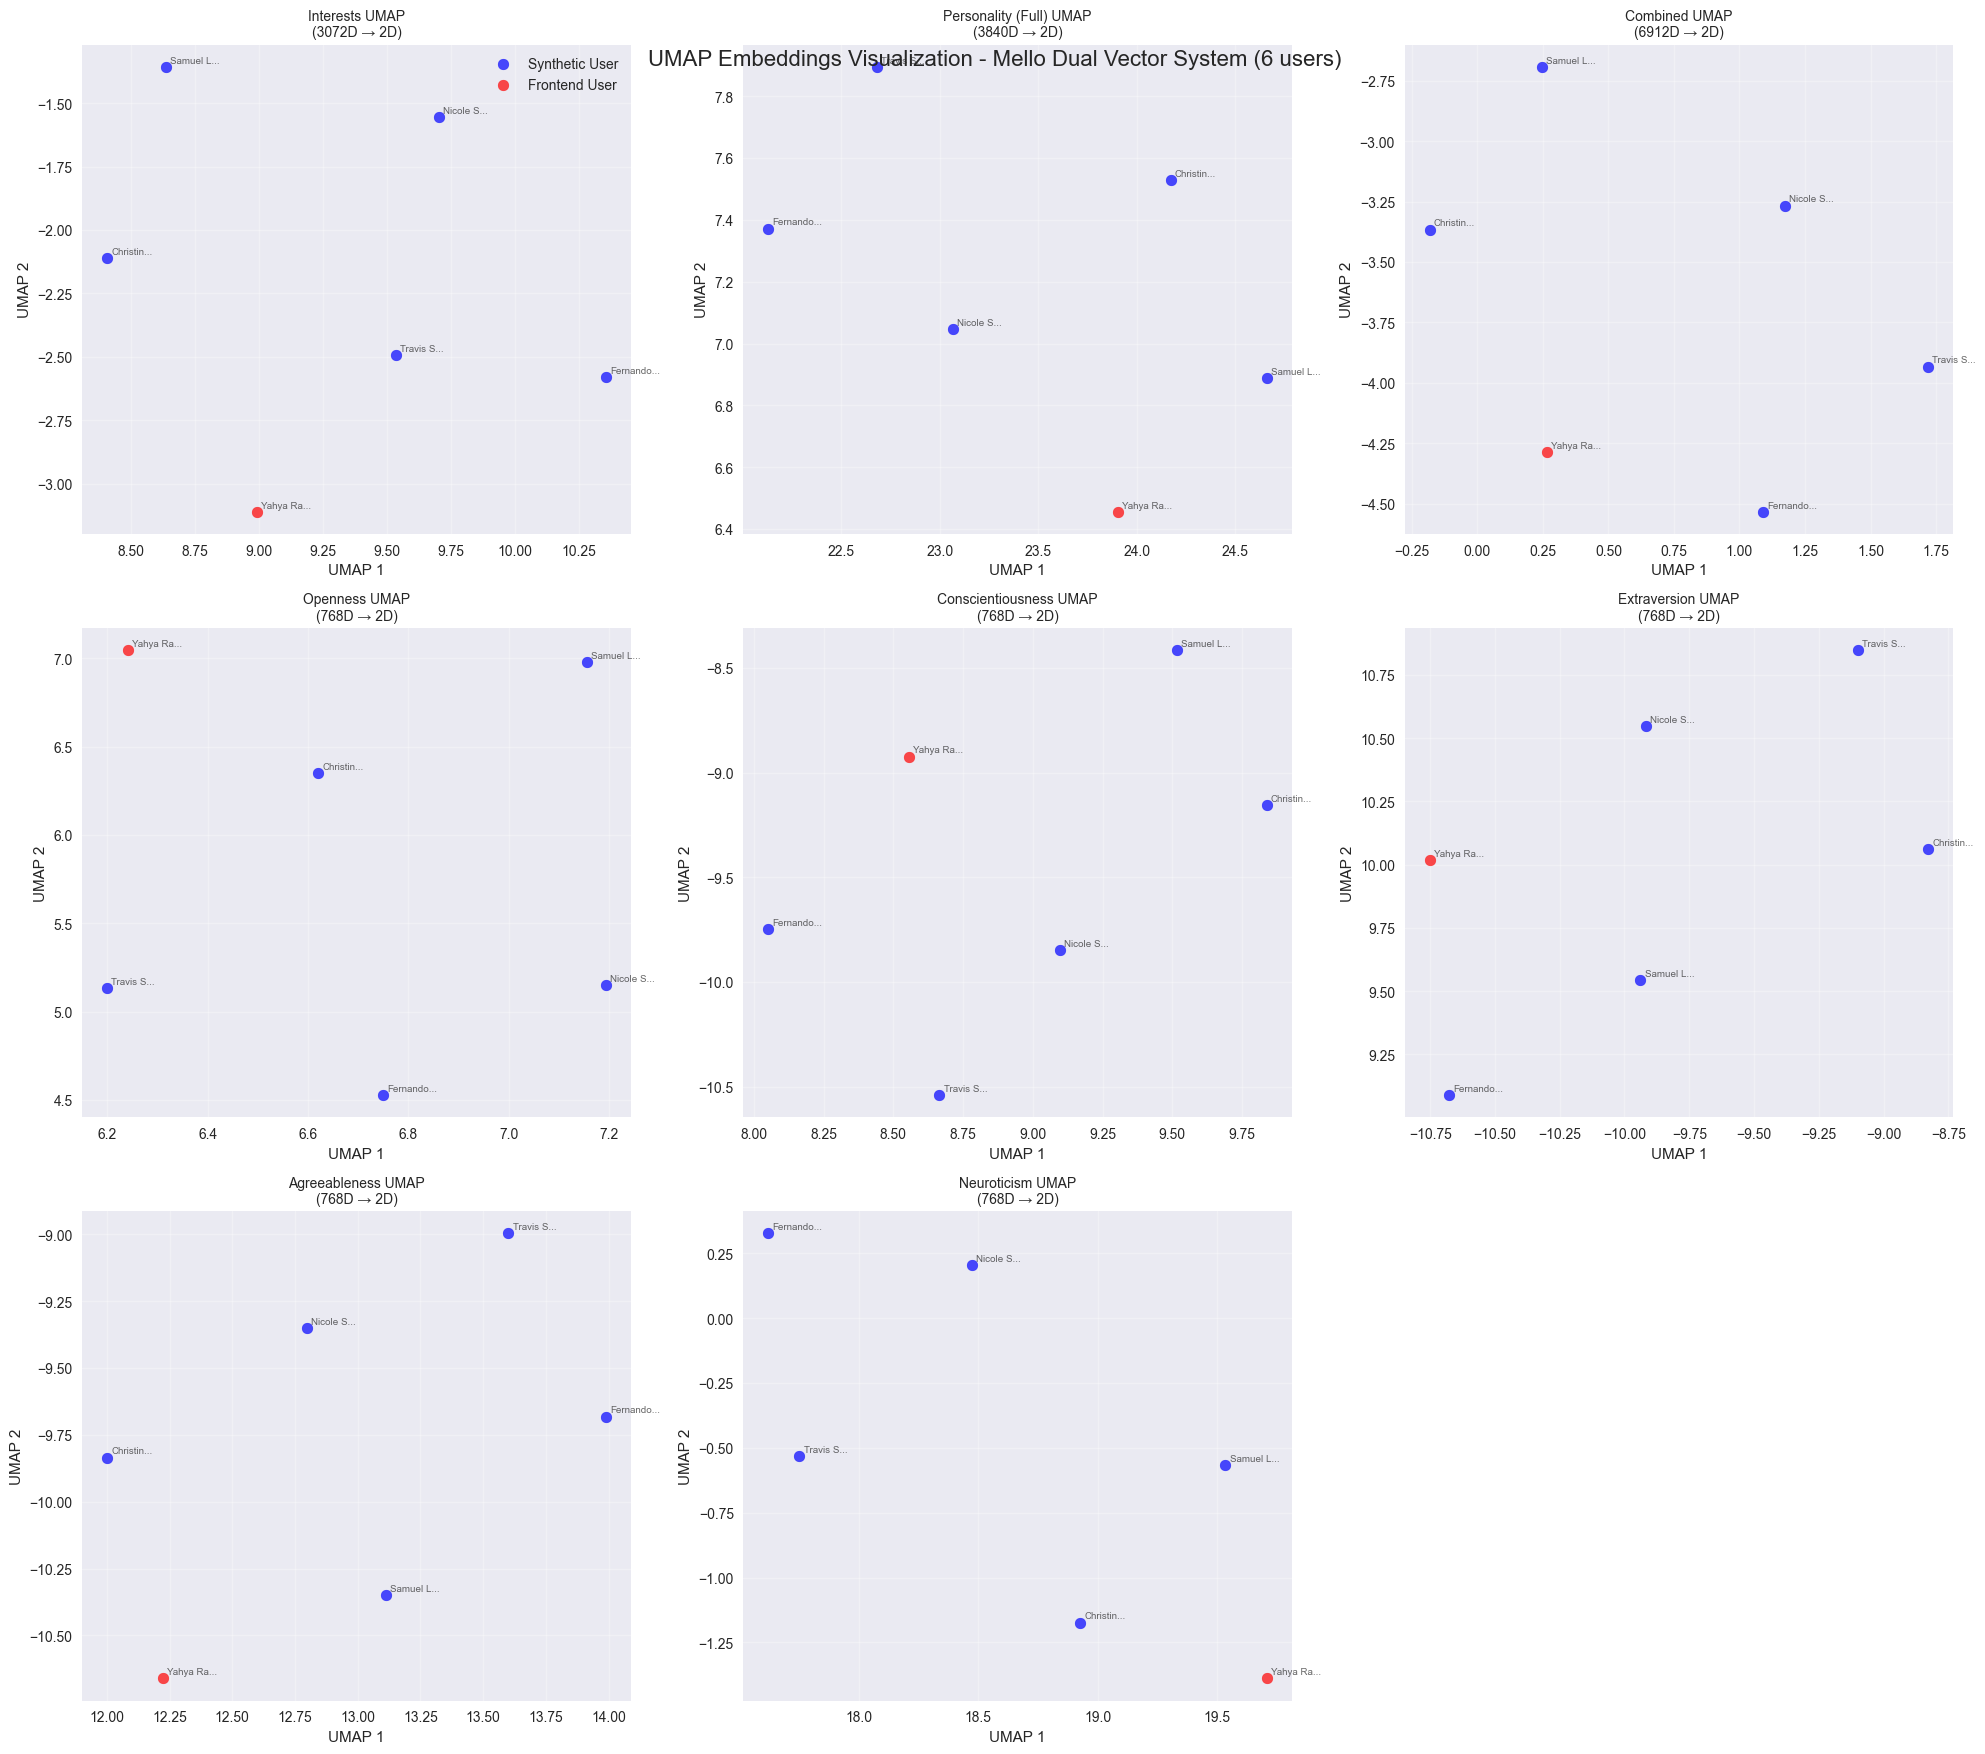

✅ UMAP visualizations complete!

📈 Creating backup PCA visualizations...


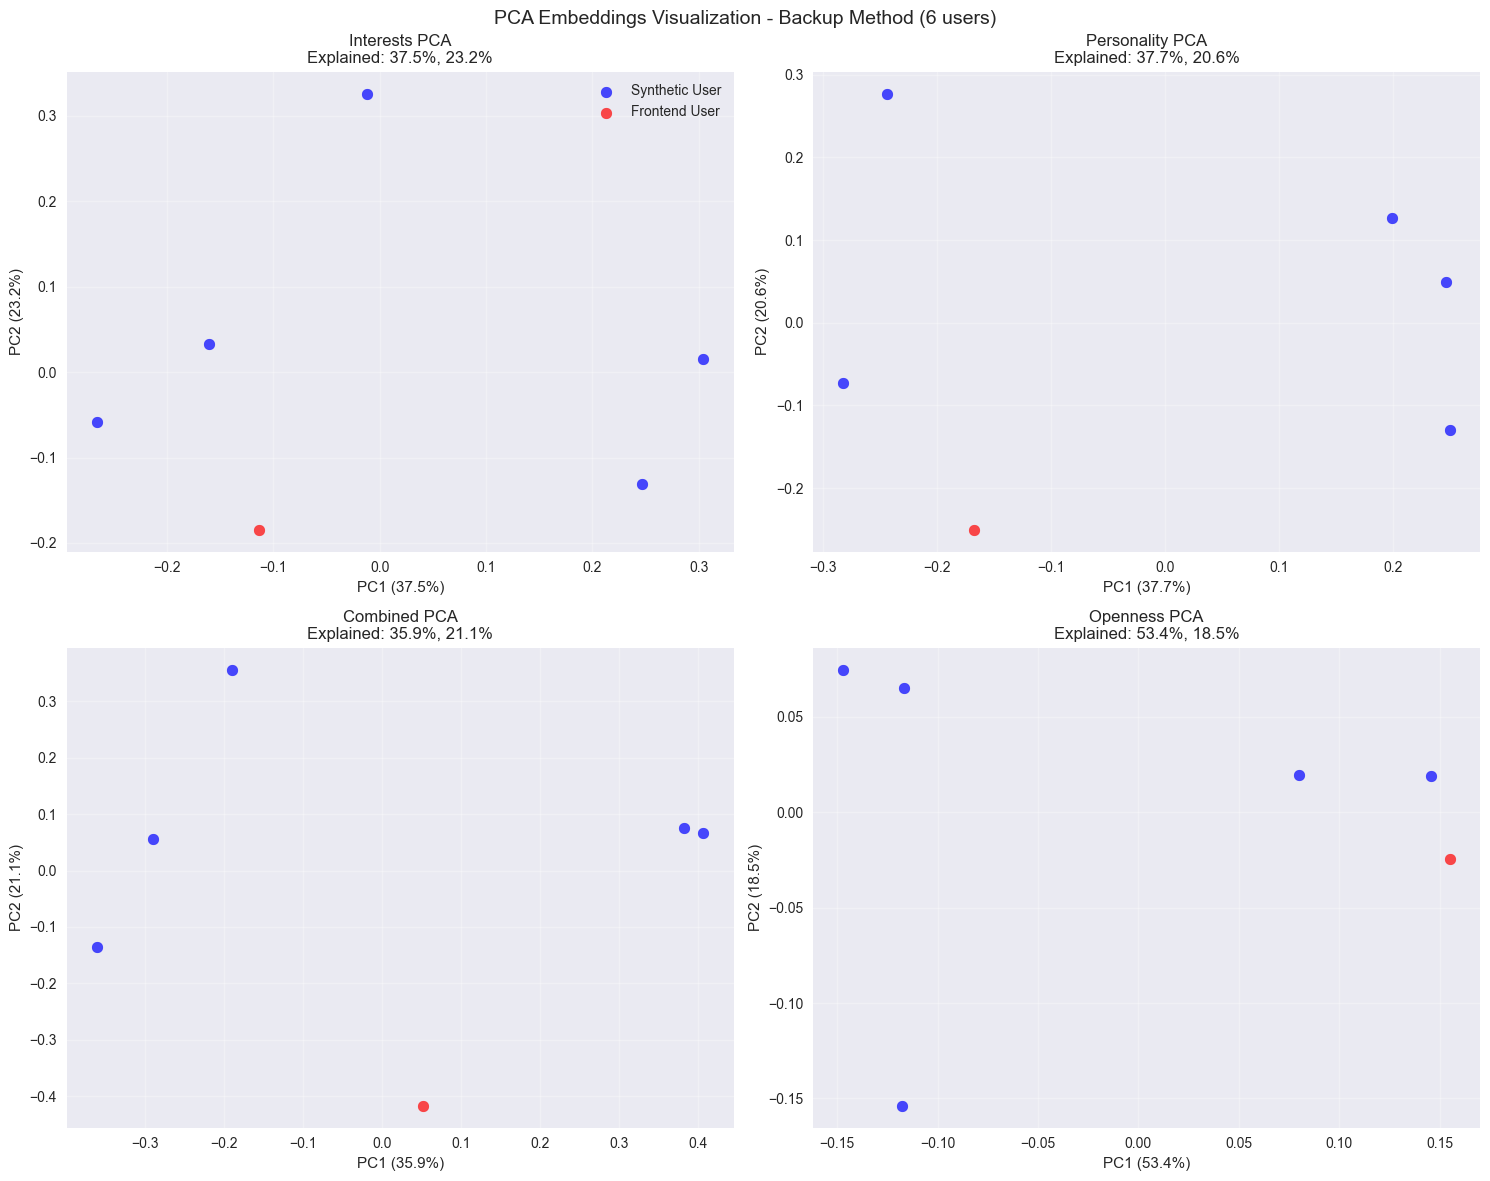

✅ PCA backup visualizations complete!


In [6]:
print("🗺️  Creating UMAP visualizations...")

# Check number of users and adjust parameters accordingly
n_users = len(dual_users)
print(f"📊 Visualizing {n_users} users with dual embeddings")

if n_users < 3:
    print("⚠️  Need at least 3 users for UMAP visualization")
else:
    # Set up UMAP parameters based on data size
    n_neighbors = min(15, max(2, n_users - 1))  # Much smaller neighbors for small datasets

    umap_params = {
        'n_neighbors': n_neighbors,
        'min_dist': 0.1,
        'metric': 'cosine',
        'random_state': 42,
        'n_components': 2,
        'densmap': False,  # Disable for better stability
        'low_memory': True  # Use low memory mode
    }

    print(f"🔧 UMAP parameters: n_neighbors={n_neighbors}, min_dist=0.1")

    # Create a large figure with subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 18))
    fig.suptitle(f'UMAP Embeddings Visualization - Mello Dual Vector System ({n_users} users)', fontsize=16, y=0.95)

    # Define the embeddings to visualize
    embeddings_to_plot = {
        'Interests': interests_matrix,
        'Personality (Full)': personality_matrix,
        'Combined': combined_matrix,
        'Openness': trait_matrices['Openness'],
        'Conscientiousness': trait_matrices['Conscientiousness'],
        'Extraversion': trait_matrices['Extraversion'],
        'Agreeableness': trait_matrices['Agreeableness'],
        'Neuroticism': trait_matrices['Neuroticism']
    }

    # Create UMAP plots
    plot_idx = 0
    for name, matrix in embeddings_to_plot.items():
        if plot_idx >= 8:  # Only plot first 8
            break

        row = plot_idx // 3
        col = plot_idx % 3
        ax = axes[row, col]

        try:
            print(f"   Processing {name} ({matrix.shape})...")

            # Additional check for matrix validity
            if matrix.shape[0] < 2:
                ax.text(0.5, 0.5, f'Need at least 2 users\nHave: {matrix.shape[0]}',
                        ha='center', va='center', transform=ax.transAxes)
                ax.set_title(f'{name} UMAP - Insufficient Data')
                plot_idx += 1
                continue

            # Adjust n_neighbors for this specific matrix if needed
            current_params = umap_params.copy()
            current_params['n_neighbors'] = min(current_params['n_neighbors'], matrix.shape[0] - 1)

            # Fit UMAP with error handling
            reducer = umap.UMAP(**current_params)
            embedding_2d = reducer.fit_transform(matrix)

            # Create scatter plot
            unique_types = list(set(user_types))
            for user_type in unique_types:
                mask = np.array(user_types) == user_type
                color = 'red' if user_type == 'Frontend User' else 'blue'
                ax.scatter(embedding_2d[mask, 0], embedding_2d[mask, 1],
                        c=color, alpha=0.7, s=60, label=user_type)

            # Annotate points with user names (fewer labels for clarity)
            if n_users <= 20:  # Only show names for small datasets
                for i, (x, y, user_name) in enumerate(zip(embedding_2d[:, 0], embedding_2d[:, 1], user_names)):
                    short_name = user_name[:8] + '...' if len(user_name) > 8 else user_name
                    ax.annotate(short_name, (x, y), xytext=(3, 3), textcoords='offset points',
                                fontsize=7, alpha=0.7)

            ax.set_title(f'{name} UMAP\n({matrix.shape[1]}D → 2D)', fontsize=10)
            ax.set_xlabel('UMAP 1')
            ax.set_ylabel('UMAP 2')
            ax.grid(True, alpha=0.3)

            if plot_idx == 0:  # Add legend to first plot
                ax.legend()

        except Exception as e:
            error_msg = str(e)
            if 'scipy' in error_msg or 'eigh' in error_msg:
                # Specific error message for UMAP issues
                ax.text(0.5, 0.5, f'UMAP Error:\nToo few samples for\nthis embedding type\n({matrix.shape[0]} users)',
                        ha='center', va='center', transform=ax.transAxes, fontsize=9)
            else:
                ax.text(0.5, 0.5, f'Error: {error_msg[:50]}...',
                        ha='center', va='center', transform=ax.transAxes, fontsize=8)
            ax.set_title(f'{name} UMAP - Error')
            print(f"   ❌ Error with {name}: {error_msg}")

        plot_idx += 1

    # Remove unused subplots
    for idx in range(plot_idx, 9):
        row = idx // 3
        col = idx % 3
        if row < 3 and col < 3:
            axes[row, col].remove()

    plt.tight_layout()
    plt.savefig('umap_embeddings_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ UMAP visualizations complete!")

# Alternative: Simple PCA visualization if UMAP fails
print("\n📈 Creating backup PCA visualizations...")

try:
    from sklearn.decomposition import PCA

    # Create simpler PCA plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'PCA Embeddings Visualization - Backup Method ({n_users} users)', fontsize=14)

    simple_embeddings = {
        'Interests': interests_matrix,
        'Personality': personality_matrix,
        'Combined': combined_matrix,
        'Openness': trait_matrices['Openness']
    }

    for idx, (name, matrix) in enumerate(simple_embeddings.items()):
        if idx >= 4:
            break

        row = idx // 2
        col = idx % 2
        ax = axes[row, col]

        try:
            # PCA is more stable than UMAP
            pca = PCA(n_components=2, random_state=42)
            embedding_2d = pca.fit_transform(matrix)

            # Plot
            unique_types = list(set(user_types))
            for user_type in unique_types:
                mask = np.array(user_types) == user_type
                color = 'red' if user_type == 'Frontend User' else 'blue'
                ax.scatter(embedding_2d[mask, 0], embedding_2d[mask, 1],
                        c=color, alpha=0.7, s=60, label=user_type)

            # Explained variance
            explained_var = pca.explained_variance_ratio_
            ax.set_title(f'{name} PCA\nExplained: {explained_var[0]:.1%}, {explained_var[1]:.1%}')
            ax.set_xlabel(f'PC1 ({explained_var[0]:.1%})')
            ax.set_ylabel(f'PC2 ({explained_var[1]:.1%})')
            ax.grid(True, alpha=0.3)

            if idx == 0:
                ax.legend()

        except Exception as e:
            ax.text(0.5, 0.5, f'PCA Error: {str(e)[:30]}...',
                    ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{name} PCA - Error')

    plt.tight_layout()
    plt.savefig('pca_embeddings_backup.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ PCA backup visualizations complete!")

except ImportError:
    print("⚠️  Scikit-learn not available for PCA backup")

In [ ]:
# PCA Visualizations
print("📈 Creating PCA visualizations...")

# Create a large figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle('PCA Embeddings Visualization - Mello Dual Vector System', fontsize=16, y=0.95)

# Create PCA plots
plot_idx = 0
for name, matrix in embeddings_to_plot.items():
    if plot_idx >= 8:  # Only plot first 8
        break
        
    row = plot_idx // 3
    col = plot_idx % 3
    ax = axes[row, col]
    
    try:
        # Fit PCA
        pca = PCA(n_components=2, random_state=42)
        embedding_2d = pca.fit_transform(matrix)
        
        # Create scatter plot
        for user_type in set(user_types):
            mask = np.array(user_types) == user_type
            color = 'red' if user_type == 'Frontend User' else 'blue'
            ax.scatter(embedding_2d[mask, 0], embedding_2d[mask, 1], 
                      c=color, alpha=0.7, s=60, label=user_type)
        
        # Annotate points with user names
        for i, (x, y, name) in enumerate(zip(embedding_2d[:, 0], embedding_2d[:, 1], user_names)):
            ax.annotate(name[:8] + '...' if len(name) > 8 else name, 
                       (x, y), xytext=(3, 3), textcoords='offset points', 
                       fontsize=8, alpha=0.8)
        
        # Calculate explained variance
        explained_var = pca.explained_variance_ratio_
        
        ax.set_title(f'{name} PCA\nExplained Variance: {explained_var[0]:.1%}, {explained_var[1]:.1%}', 
                    fontsize=10)
        ax.set_xlabel(f'PC1 ({explained_var[0]:.1%})')
        ax.set_ylabel(f'PC2 ({explained_var[1]:.1%})')
        ax.grid(True, alpha=0.3)
        
        if plot_idx == 0:  # Add legend to first plot
            ax.legend()
            
    except Exception as e:
        ax.text(0.5, 0.5, f'Error: {str(e)[:50]}...', 
               ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{name} PCA - Error')
    
    plot_idx += 1

# Remove the last subplot if not used
if plot_idx == 8:
    axes[2, 2].remove()

plt.tight_layout()
plt.savefig('pca_embeddings_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ PCA visualizations complete!")

## Embedding Analysis Summary

Generate insights about the embedding space and user similarities.

In [ ]:
# Analyze similarities and create summary
print("📊 Embedding Analysis Summary")
print("=" * 50)

# Population statistics
stats = population.get_statistics()
print(f"\n👥 Population Overview:")
print(f"   Total Users: {stats['total_users']}")
print(f"   Users with Dual Embeddings: {stats['users_with_dual_embeddings']}")
print(f"   Users with Dual Profiles: {stats['users_with_dual_profiles']}")
print(f"   Interests Embedding Dimension: {stats['interests_embedding_dimension']}")
print(f"   Personality Embedding Dimension: {stats['personality_embedding_dimension']}")

# Find most similar users to the frontend user
if len(dual_users) > 1:
    print(f"\n🔍 Most Similar Users to {frontend_user.name}:")
    
    similarity_modes = ['interests', 'personality', 'combined']
    for mode in similarity_modes:
        try:
            matches = population.find_similar_users(frontend_user, top_k=3, mode=mode)
            print(f"\n   {mode.title()} Similarity:")
            for i, (user, similarity) in enumerate(matches[:3], 1):
                print(f"      {i}. {user.name}: {similarity:.3f}")
        except Exception as e:
            print(f"   {mode}: Error - {e}")

# Embedding variance analysis
print(f"\n📈 Embedding Variance Analysis:")
embedding_types = {
    'Interests': interests_matrix,
    'Personality': personality_matrix,
    'Combined': combined_matrix
}

for name, matrix in embedding_types.items():
    if matrix.shape[0] > 1:  # Need at least 2 users
        variance = np.var(matrix, axis=0)
        mean_variance = np.mean(variance)
        print(f"   {name}: Mean variance = {mean_variance:.6f}")

# Personality trait analysis
print(f"\n🧠 Personality Trait Variance:")
for trait, matrix in trait_matrices.items():
    if matrix.shape[0] > 1:
        variance = np.var(matrix, axis=0)
        mean_variance = np.mean(variance)
        print(f"   {trait}: Mean variance = {mean_variance:.6f}")

print(f"\n✅ Analysis complete! Visualizations saved as PNG files.")
print(f"📁 Files created:")
print(f"   - umap_embeddings_visualization.png")
print(f"   - pca_embeddings_visualization.png")
print(f"   - {sample_json_path}")

## Conclusion

This notebook demonstrated the complete Mello dual-vector system:

### Key Features Implemented:
1. **Dual Embedding Architecture**: 3072D interests + 3840D personality (5 traits × 768D)
2. **Frontend Integration**: Seamless loading of React form data
3. **AI Profile Generation**: LLM-generated interests and personality descriptions
4. **Multi-Modal Similarity**: Separate matching for interests, personality, and combined
5. **Advanced Visualization**: UMAP and PCA for different embedding spaces

### Visualization Insights:
- **Individual Traits**: Each Big 5 trait creates distinct clustering patterns
- **Personality vs Interests**: Different embedding spaces capture different aspects of user preferences
- **Combined Space**: Provides comprehensive user representation for matching
- **Frontend User**: Real user data integrates seamlessly with synthetic population

This system enables sophisticated campus social discovery based on deep cultural and personality compatibility.